## Problem statement

In this competition, you will build Regression models which accurately predict the popularity of new articles (the number of times it w will be shared online) based on ~60 features provided to you.

**Importance of online news**

The consumption of online news is expediting day by day due to the extensive adoption of smartphones and the rise of social networks. Note that online news content comprises various key properties. For example, it is easily produced and small in size; its lifespan is short and the cost is low. Such Qualities make news content more effective to be consumed on social sharing platforms. More interestingly, this sort of content can capture the eye of a signiﬁcant amount of Internet users within a brief period of your time. As a result, the main target on the analysis of online news content like predicting the recognition of stories articles, demonstrating the decay of interest over time to know the world of online news has greatly increased since it has so many practical meanings.

**Why news popularity prediction?**

There are multiple areas of applications for online news popularity prediction. Some of these benefits include gaining better insights into the audience consuming online news content. Consequently, it increases the ability of news organizations to deliver more relevant and appealing content in a proactive manner as well as the company can allocate resources more wisely to prepare stories over their life cycle. Moreover, prediction of news content is also beneﬁcial for trend forecasting, understanding the collective human behavior, advertisers to propose more proﬁtable monetization techniques, and readers to ﬁlter the huge amount of information quickly and efﬁciently.

# Step 1: Reading and Understanding the Data

###   Importing Necessary Libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import xgboost as xgb


### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno
pd.set_option('display.max_columns', None)

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


# from nltk.corpus import stopwords
# nltk.download('stopwords')
# from nltk.tokenize import word_tokenize

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor


from sklearn import tree
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import metrics


#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Import Datasets

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(29733, 61)
(9911, 60)
(9911, 2)
(61, 3)


In [3]:
data.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [4]:
data = data.set_index('id')

In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29733 entries, 0 to 29732
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            29733 non-null  object 
 1   n_tokens_title                 29733 non-null  float64
 2   n_tokens_content               29733 non-null  float64
 3   n_unique_tokens                29733 non-null  float64
 4   n_non_stop_words               29733 non-null  float64
 5   n_non_stop_unique_tokens       29733 non-null  float64
 6   num_hrefs                      28921 non-null  float64
 7   num_self_hrefs                 25200 non-null  float64
 8   num_imgs                       24326 non-null  float64
 9   num_videos                     29146 non-null  float64
 10  average_token_length           29733 non-null  float64
 11  num_keywords                   29269 non-null  float64
 12  data_channel_is_lifestyle      29733 non-null 

### Remove columns which are not useful for modelling

In [6]:
data.drop(['url'], axis=1, inplace=True)

In [7]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


# Step 2: Data Preparation

Lets analyse the features that are given to us. As detailed in the Data section of the competition page, the features provided come from different sources and have been categorized into various types. Some of these are coming directly from other NLP (Natural language processing) models. Let's print and try to categorize the variable names for better analysis.

In [8]:
for i in data_dict.iterrows():
    print(i[1]['column'],':',i[1]['description'])

url : URL of the article (non-predictive)
timedelta : Days between the article publication and the dataset acquisition (non-predictive)
ntokenstitle : Number of words in the title
ntokenscontent : Number of words in the content
nuniquetokens : Rate of unique words in the content
nnonstop_words : Rate of non-stop words in the content
nnonstopuniquetokens : Rate of unique non-stop words in the content
num_hrefs : Number of links
numselfhrefs : Number of links to other articles published by Mashable
num_imgs : Number of images
num_videos : Number of videos
averagetokenlength : Average length of the words in the content
numkeywords : Number of keywords in the metadata
datachannelislifestyle : Is data channel 'Lifestyle'?
datachannelis_entertainment : Is data channel 'Entertainment'?
datachannelis_bus : Is data channel 'Business'?
datachannelis_socmed : Is data channel 'Social Media'?
datachannelis_tech : Is data channel 'Tech'?
datachannelis_world : Is data channel 'World'?
kwminmin : Wors

In [9]:
word_features = ['n_tokens_title', 
                 'n_tokens_content', 
                 'n_unique_tokens', 
                 'n_non_stop_words', 
                 'n_non_stop_unique_tokens', 
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday_is_monday', 
                     'weekday_is_tuesday', 
                     'weekday_is_wednesday',
                     'weekday_is_thursday',
                     'weekday_is_friday',
                     'weekday_is_saturday',
                     'weekday_is_sunday',
                     'is_weekend']

channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']

keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

# ids = ['id']

# others = ['url']

target = ['shares']

In [10]:
features = [*word_features, *media_features, 
            *temporal_features, *channel_features, 
            *keyword_features, *reference_features, 
            *topic_features, *subjectivity_features, 
            *sentiment_features, *target]

len(features), len(data.columns)

(59, 59)

### Splitting the Train Data into Training and Validation Sets

In [11]:
X = data.loc[:, data.columns != 'shares']
y = data[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

[i.shape for i in [X_train, X_test, y_train, y_test]]

[(23786, 58), (5947, 58), (23786, 1), (5947, 1)]

In [13]:
X_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12722,11.0,434.0,0.537559,1.0,0.650909,13.0,5.0,1.0,1.0,4.465438,5.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,549.0,119.000000,20800.0,843300.0,311200.000000,1940.056391,3449.327025,2790.597387,1300.0,19900.0,6150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.040003,0.041853,0.257899,0.620245,0.040000,NaN,0.223466,0.048387,0.009217,0.840000,0.160000,0.352386,0.050000,0.8,-0.285764,-0.40,-0.155556,0.90,0.40,0.4,0.40
19161,10.0,285.0,0.620438,1.0,0.691011,15.0,4.0,10.0,0.0,4.364912,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,678.0,308.857143,4100.0,843300.0,332785.714286,1499.250000,8669.153846,5229.927616,13900.0,31500.0,22700.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.028572,0.028666,0.028572,0.885620,0.028572,0.643750,0.025000,0.028070,0.017544,0.615385,NaN,0.425000,0.100000,0.5,-0.537500,-0.70,-0.187500,1.00,0.50,0.5,0.50
17705,11.0,572.0,0.576710,1.0,0.754821,16.0,0.0,1.0,0.0,4.854895,8.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,318.0,126.714286,0.0,843300.0,322375.000000,0.000000,4444.181688,2383.172875,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.584860,0.339585,0.025001,0.025537,0.025017,0.363235,0.134066,0.036713,0.008741,0.807692,0.192308,0.343856,0.062500,1.0,-0.321667,-0.75,-0.125000,0.54,0.16,NaN,0.16
3394,12.0,233.0,0.602620,1.0,0.804348,4.0,NaN,NaN,0.0,4.695279,6.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,551.0,143.000000,0.0,843300.0,298616.666667,0.000000,4317.313514,2591.901385,1800.0,1800.0,1800.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033482,0.033340,0.034033,0.033356,0.865789,0.308586,0.043224,0.017167,0.017167,0.500000,0.500000,0.402841,0.136364,0.7,-0.208333,-0.25,-0.166667,0.00,0.00,0.5,0.00
1416,8.0,586.0,0.535714,1.0,0.694286,8.0,3.0,11.0,0.0,4.510239,7.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,369.0,114.400000,0.0,843300.0,164528.571429,0.000000,3581.760784,NaN,2500.0,2500.0,2500.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028578,0.171545,0.589345,0.028575,0.181956,0.419458,0.205988,0.058020,0.008532,0.871795,0.128205,0.401208,0.033333,1.0,-0.198333,-0.50,-0.100000,0.00,0.00,0.5,0.00


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23786 entries, 12722 to 5640
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 23786 non-null  float64
 1   n_tokens_content               23786 non-null  float64
 2   n_unique_tokens                23786 non-null  float64
 3   n_non_stop_words               23786 non-null  float64
 4   n_non_stop_unique_tokens       23786 non-null  float64
 5   num_hrefs                      23131 non-null  float64
 6   num_self_hrefs                 20152 non-null  float64
 7   num_imgs                       19468 non-null  float64
 8   num_videos                     23309 non-null  float64
 9   average_token_length           23786 non-null  float64
 10  num_keywords                   23417 non-null  float64
 11  data_channel_is_lifestyle      23786 non-null  float64
 12  data_channel_is_entertainment  23786 non-nu

In [15]:
X_train.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23131.000000,20152.000000,19468.000000,23309.000000,23786.000000,23417.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,22902.000000,23406.000000,23717.000000,23676.000000,22569.000000,23692.000000,23547.000000,23243.000000,23031.000000,23556.000000,22374.000000,23527.000000,22995.000000,23189.000000,22544.000000,23552.000000,23096.000000,23710.000000,22584.000000,22051.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,21999.000000,23506.000000,23114.000000,23063.000000,23309.000000,23304.000000,22821.000000,23440.000000,23661.000000,23634.000000,23152.000000,23221.000000,23682.000000,23575.000000,23158.000000,22597.000000
mean,10.411629,544.782225,0.560482,1.013663,0.700950,10.840560,3.285282,4.465122,1.272556,4.546123,7.224666,0.052174,0.176196,0.157866,0.057387,0.186202,0.214664,25.739149,1147.128228,310.116216,13590.525173,753810.253002,259655.238813,1118.334046,5637.369106,3136.156573,3974.024483,10402.381817,6422.613617,0.167689,0.185648,0.188077,0.184740,0.143531,0.062590,0.067039,0.129427,0.185164,0.140239,0.217885,0.223023,0.233647,0.443413,0.118702,0.039590,0.016648,0.681464,0.288507,0.353148,0.095536,0.755693,-0.258892,-0.521370,-0.106629,0.281945,0.070068,0.342397,0.155417
std,2.121878,462.636693,4.543878,6.752144,4.213024,11.342039,3.906943,8.252797,4.217423,0.847862,1.911287,0.222382,0.380995,0.364623,0.232585,0.389278,0.410598,69.212291,3661.075483,589.930497,58024.996895,212547.517775,135093.941826,1134.515998,6009.298658,1300.582569,18529.641843,40389.277614,23391.015551,0.373598,0.388831,0.390782,0.388095,0.350621,0.242228,0.250094,0.335680,0.264215,0.218400,0.283454,0.295242,0.289480,0.116487,0.096480,0.017382,0.010840,0.190171,0.155708,0.104814,0.071181,0.248145,0.127258,0.291156,0.093865,0.324153,0.265158,0.188724,0.225834
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,245.000000,0.471866,1.000000,0.627372,4.000000,1.000000,1.000000,0.000000,4.476950,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,140.659000,0.000000,843300.000000,173233.333333,0.000000,3560.441280,2387.620370,629.000000,1000.000000,973.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025053,0.025012,0.028571,0.028571,0.028574,0.396367,0.057629,0.028340,0.009639,0.600000,0.187500,0.305128,0.050000,0.600000,-0.327778,-0.700000,-0.125000,0.

### Remove Duplicates

In [16]:
X_train.drop_duplicates() #- remove duplicates

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12722,11.0,434.0,0.537559,1.0,0.650909,13.0,5.0,1.0,1.0,4.465438,5.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,549.0,119.000000,20800.0,843300.0,311200.000000,1940.056391,3449.327025,2790.597387,1300.0,19900.0,6150.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.040003,0.041853,0.257899,0.620245,0.040000,NaN,0.223466,0.048387,0.009217,0.840000,0.160000,0.352386,0.050000,0.8,-0.285764,-0.400,-0.155556,0.90,0.40,0.4,0.40
19161,10.0,285.0,0.620438,1.0,0.691011,15.0,4.0,10.0,0.0,4.364912,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,678.0,308.857143,4100.0,843300.0,332785.714286,1499.250000,8669.153846,5229.927616,13900.0,31500.0,22700.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.028572,0.028666,0.028572,0.885620,0.028572,0.643750,0.025000,0.028070,0.017544,0.615385,NaN,0.425000,0.100000,0.5,-0.537500,-0.700,-0.187500,1.00,0.50,0.5,0.50
17705,11.0,572.0,0.576710,1.0,0.754821,16.0,0.0,1.0,0.0,4.854895,8.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,318.0,126.714286,0.0,843300.0,322375.000000,0.000000,4444.181688,2383.172875,0.0,0.0,0.00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.584860,0.339585,0.025001,0.025537,0.025017,0.363235,0.134066,0.036713,0.008741,0.807692,0.192308,0.343856,0.062500,1.0,-0.321667,-0.750,-0.125000,0.54,0.16,NaN,0.16
3394,12.0,233.0,0.602620,1.0,0.804348,4.0,NaN,NaN,0.0,4.695279,6.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,551.0,143.000000,0.0,843300.0,298616.666667,0.000000,4317.313514,2591.901385,1800.0,1800.0,1800.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033482,0.033340,0.034033,0.033356,0.865789,0.308586,0.043224,0.017167,0.017167,0.500000,0.500000,0.402841,0.136364,0.7,-0.208333,-0.250,-0.166667,0.00,0.00,0.5,0.00
1416,8.0,586.0,0.535714,1.0,0.694286,8.0,3.0,11.0,0.0,4.510239,7.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,369.0,114.400000,0.0,843300.0,164528.571429,0.000000,3581.760784,NaN,2500.0,2500.0,2500.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028578,0.171545,0.589345,0.028575,0.181956,0.419458,0.205988,0.058020,0.008532,0.871795,0.128205,0.401208,0.033333,1.0,-0.198333,-0.500,-0.100000,0.00,0.00,0.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,9.0,423.0,0.594458,1.0,0.757937,22.0,2.0,20.0,1.0,4.638298,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,339.0,163.666667,13900.0,NaN,441633.333333,3490.598812,7592.062928,5496.728060,4000.0,4000.0,4000.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033334,0.033353,0.033334,0.866647,0.033333,0.632162,0.154361,0.052009,0.021277,0.709677,0.290323,0.422107,0.100000,1.0,-0.380556,-0.800,-0.125000,0.00,0.00,0.5,0.00
24423,11.0,578.0,0.522648,1.0,0.684507,11.0,0.0,1.0,0.0,4.970588,10.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,699.0,184.000000,0.0,843300.0,196669.900000,0.000000,4504.648000,2763.875362,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.020002,0.020002,0.632940,0.020001,0.307056,0.464454,0.088564,0.032872,0.029412,

In [17]:
X_train.shape

(23786, 58)

In [18]:
constant_columns = [col for col in X_train.columns if len(X_train[col].unique()) <=2] # to see even blank values in the constant columns
                                                                                #otherwise it should be equal to 1

In [19]:
constant_columns

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world']

In [20]:
constant_columns = [col for col in X_train.columns if len(X_train[col].unique()) <=1] # to see even blank values in the constant columns
                                                                                #otherwise it should be equal to 1

In [21]:
constant_columns

[]

### Missing Value Analysis

In [22]:
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
missing_data_percent[missing_data_percent>0].sort_values(ascending=False)

num_imgs                        18.153536
num_self_hrefs                  15.277895
global_subjectivity              7.512823
is_weekend                       7.294207
self_reference_max_shares        5.936265
weekday_is_wednesday             5.221559
kw_max_max                       5.116455
weekday_is_sunday                5.053393
abs_title_sentiment_polarity     4.998739
avg_positive_polarity            4.057008
kw_min_min                       3.716472
weekday_is_monday                3.325486
kw_avg_avg                       3.174136
global_rate_negative_words       3.039603
weekday_is_friday                2.900866
global_rate_positive_words       2.825191
num_hrefs                        2.753721
min_negative_polarity            2.665433
abs_title_subjectivity           2.640209
weekday_is_tuesday               2.509880
max_negative_polarity            2.375347
kw_max_avg                       2.282855
rate_negative_words              2.026402
rate_positive_words              2

In [23]:
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
impute_cols = list(missing_data_percent[missing_data_percent.gt(0)].index)

print(impute_cols)

['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']


### Impute Missing Values

In [24]:
imp = SimpleImputer(strategy='median') 
                                       
X_train[impute_cols] = imp.fit_transform(X_train[impute_cols])

'''these are continous numerical columns not discrete columns,
 we can also impute by using box plots ''' 

'these are continous numerical columns not discrete columns,\n we can also impute by using box plots '

In [25]:
#Columns with missing percentage greater than 0%
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
missing_data_percent[missing_data_percent>0]

Series([], dtype: float64)

In [26]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23786 entries, 12722 to 5640
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 23786 non-null  float64
 1   n_tokens_content               23786 non-null  float64
 2   n_unique_tokens                23786 non-null  float64
 3   n_non_stop_words               23786 non-null  float64
 4   n_non_stop_unique_tokens       23786 non-null  float64
 5   num_hrefs                      23786 non-null  float64
 6   num_self_hrefs                 23786 non-null  float64
 7   num_imgs                       23786 non-null  float64
 8   num_videos                     23786 non-null  float64
 9   average_token_length           23786 non-null  float64
 10  num_keywords                   23786 non-null  float64
 11  data_channel_is_lifestyle      23786 non-null  float64
 12  data_channel_is_entertainment  23786 non-nu

In [27]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=X_train[X_train['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)
print(num_of_nowords)

# Drop these items or rows with n_tokens_content = 0
y_train=y_train[X_train['n_tokens_content'] != 0]
X_train = X_train[X_train['n_tokens_content'] != 0]

number of news items with no words 716
Int64Index([14567, 15236,  9118, 22549, 16991, 12266,  3498, 16302,  2482,
            12988,
            ...
            12125, 19754,  6064, 19934, 29123, 19701, 17187,  5939,  7074,
            26475],
           dtype='int64', name='id', length=716)


In [28]:
X_train.shape

(23070, 58)

In [29]:
y_train.shape

(23070, 1)

In [30]:
X_train["n_non_stop_words"].describe()

count    23070.000000
mean         1.045124
std          6.853729
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

In [31]:
# Here, we will go ahead and drop the field of ' n_non_stop_words. It doesn't contain relaible information.
X_train.drop(labels=['n_non_stop_words'], axis = 1, inplace=True)

In [32]:
X_train.drop(['is_weekend'], axis=1,inplace=True) #As this info is already captured in sat and sunday columns

In [33]:
indicator_columns = ["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday",                
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]


In [34]:
numeric_columns = list(X_train.columns[~X_train.columns.isin(indicator_columns)])

In [35]:
numeric_columns

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

### Outliers treatment

In [36]:

clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X_out = X_train[numeric_columns].values
out_pred = clf.fit_predict(X_out)

In [37]:
print(out_pred)

[1 1 1 ... 1 1 1]


In [38]:
print(pd.Series(out_pred).value_counts())

 1    21182
-1     1888
dtype: int64


In [39]:
X_train_out_removed = X_train.loc[out_pred==1,:]
print(X_train_out_removed.shape)

(21182, 56)


In [40]:
y_train=y_train.loc[out_pred==1]

In [41]:
y_train.shape

(21182, 1)

In [42]:
Q1 = X_train_out_removed[numeric_columns].quantile(0.25)
Q3 = X_train_out_removed[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

outlier_count = ((X_train_out_removed[numeric_columns] < (Q1 - 1.5 * IQR)) | (X_train_out_removed[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print(outlier_count)

n_tokens_title                    89
n_tokens_content                1040
n_unique_tokens                  270
n_non_stop_unique_tokens         373
num_hrefs                       1595
num_self_hrefs                  1241
num_imgs                        4378
num_videos                      1572
average_token_length             286
num_keywords                       0
kw_min_min                      2230
kw_max_min                      1722
kw_avg_min                       822
kw_min_max                      2619
kw_max_max                      4438
kw_avg_max                       436
kw_min_avg                         0
kw_max_avg                       966
kw_avg_avg                       916
self_reference_min_shares       2505
self_reference_max_shares       2259
self_reference_avg_sharess      2114
LDA_00                          2825
LDA_01                          3129
LDA_02                          1244
LDA_03                          2193
LDA_04                             0
g

No handles with labels found to put in legend.


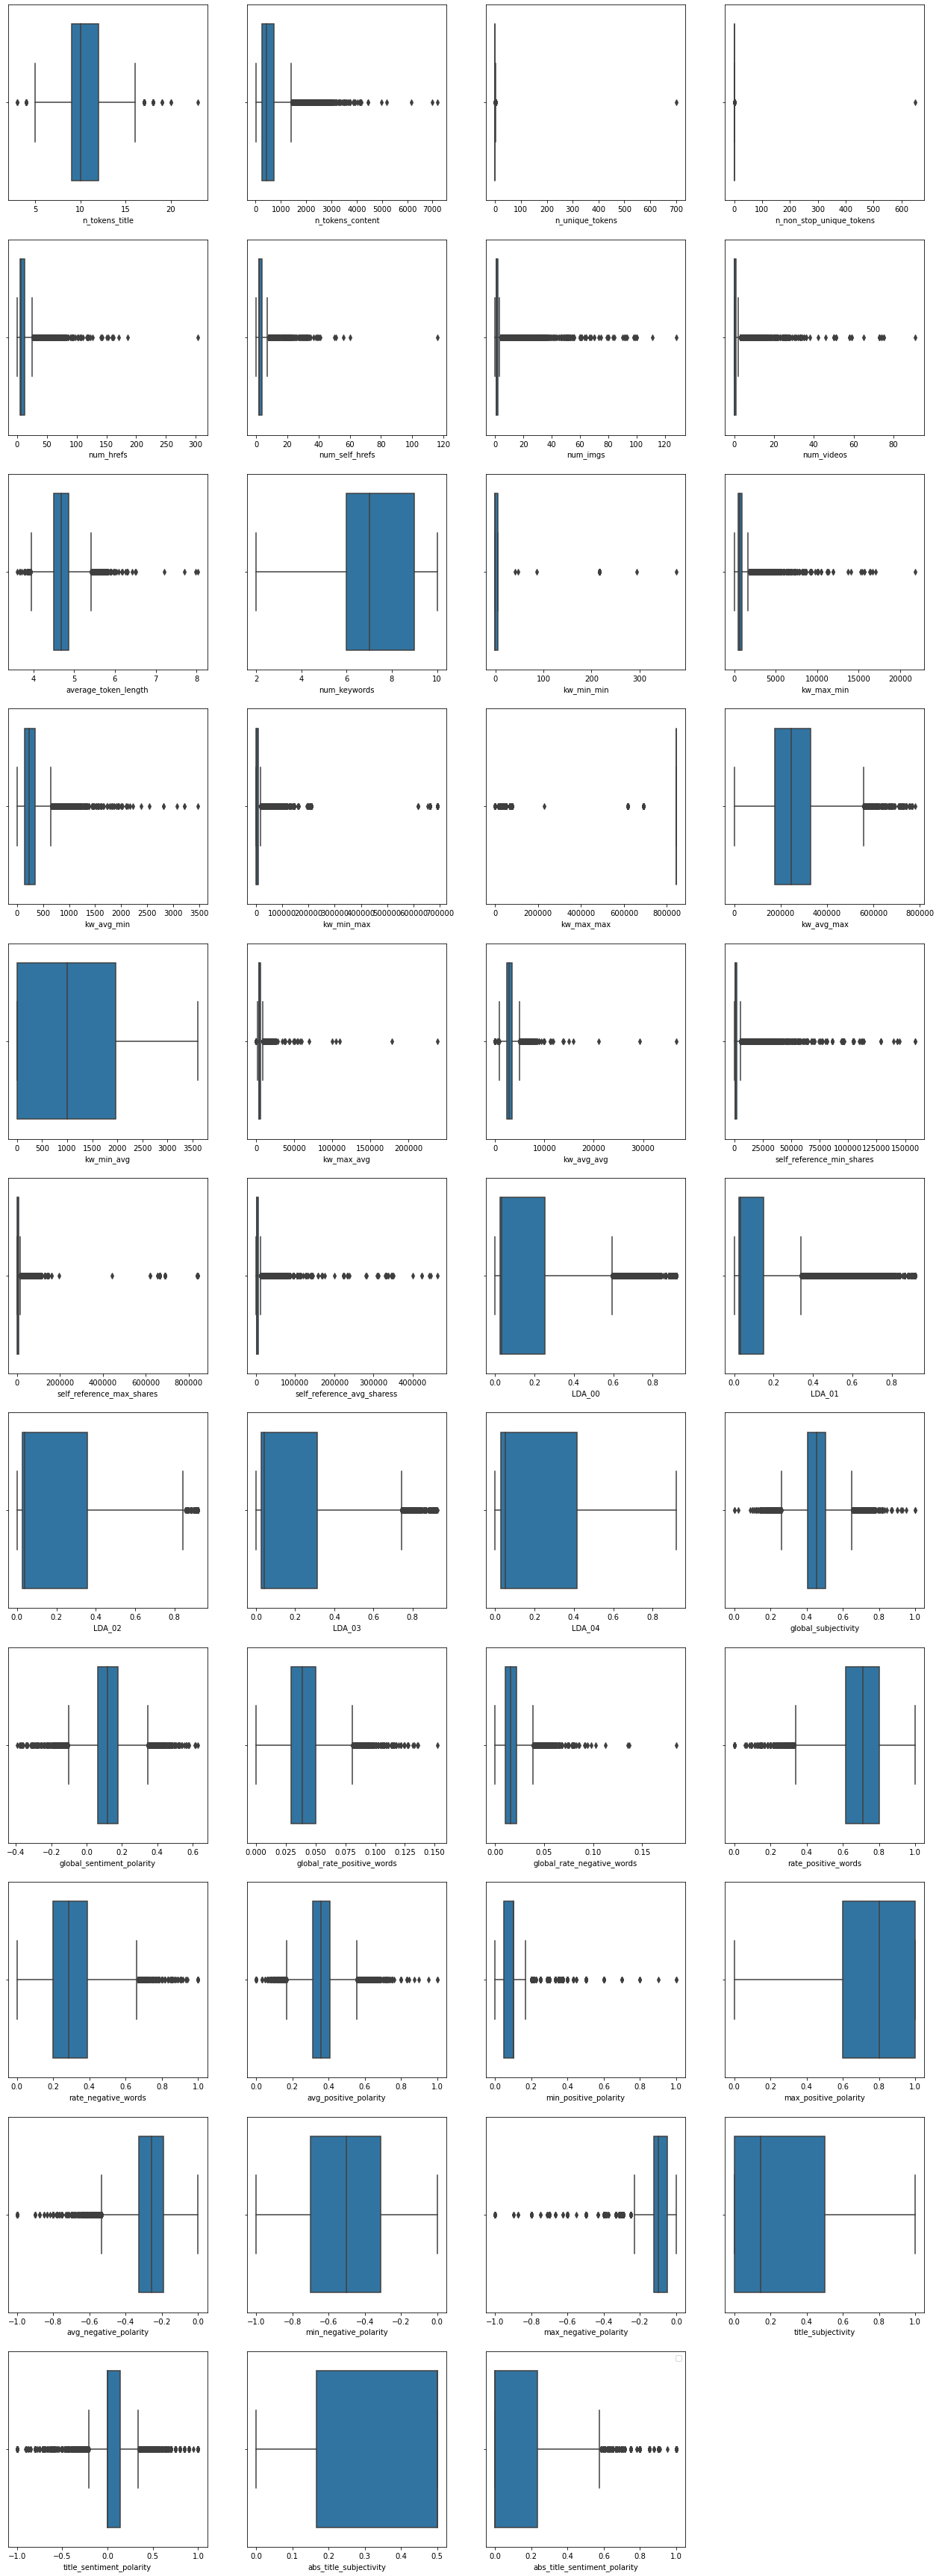

In [43]:

plt.figure(figsize=(22,80))
for i in (enumerate(numeric_columns)): ## i is tuple which has key and column name pairs
    plt.subplot(len(numeric_columns)//4 + 4,4,i[0]+1)
    sns.boxplot(X_train_out_removed[i[1]], orient='v')

plt.legend()
plt.show()  

In [44]:
#Treating outlier by clipping :  

for col in numeric_columns:
    percentiles = X_train_out_removed[col].quantile([0.01,0.99]).values
    X_train_out_removed[col][X_train_out_removed[col] <= percentiles[0]] = percentiles[0]
    X_train_out_removed[col][X_train_out_removed[col] >= percentiles[1]] = percentiles[1]

No handles with labels found to put in legend.


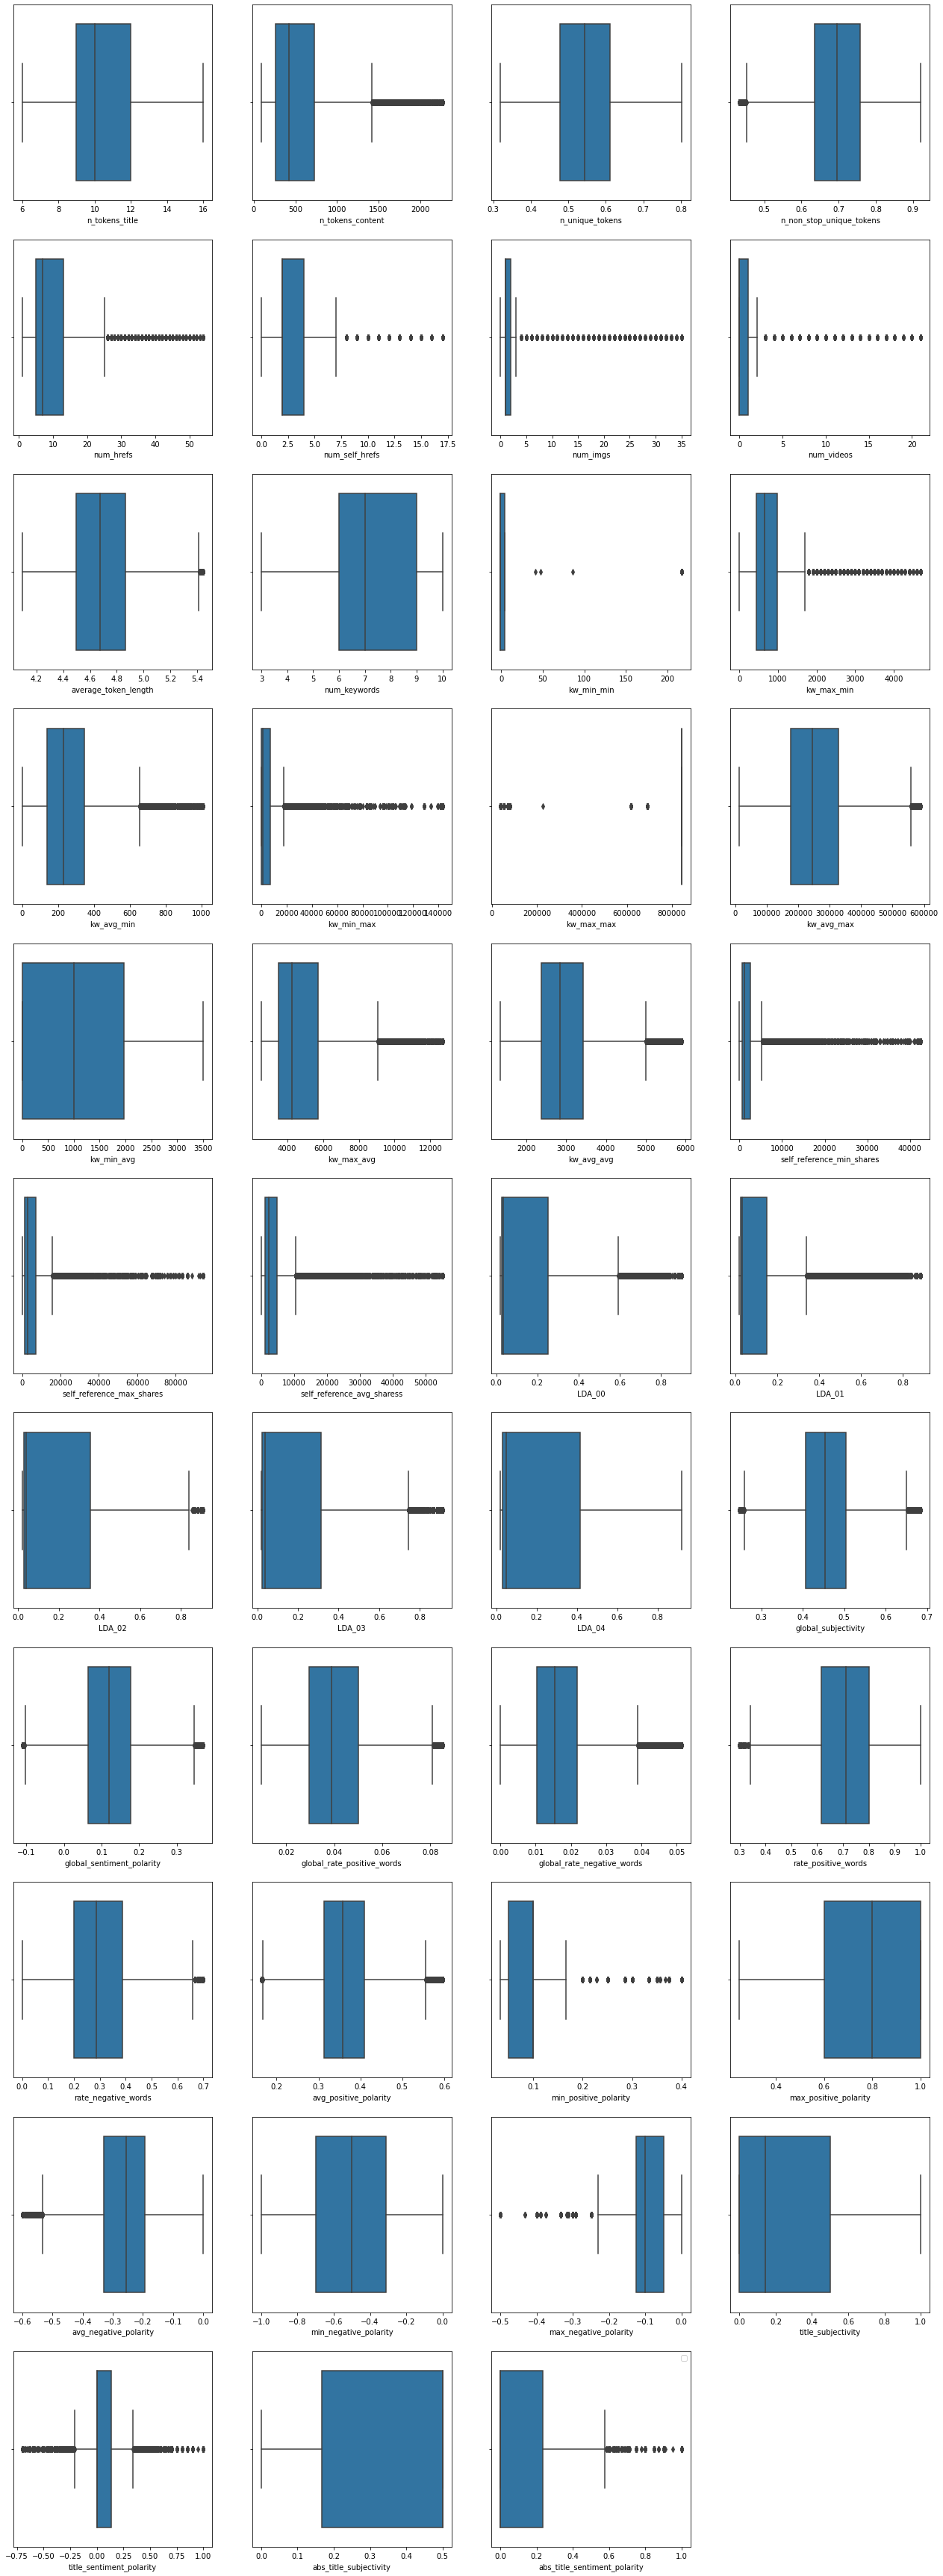

In [45]:
plt.figure(figsize=(22,80))
for i in (enumerate(numeric_columns)): ## i is tuple which has key and column name pairs
    plt.subplot(len(numeric_columns)//4 + 4,4,i[0]+1)
    sns.boxplot(X_train_out_removed[i[1]], orient='v')

plt.legend()
plt.show()  

In [46]:
low_shares = y_train['shares']<=10 

In [47]:
print(y_train.shape)
print(X_train_out_removed.shape)

(21182, 1)
(21182, 56)


In [48]:
y_train = y_train.loc[~low_shares,:]
X_train_out_removed = X_train_out_removed.loc[~low_shares,:]

In [49]:
print(y_train.shape)
print(X_train_out_removed.shape)

(21181, 1)
(21181, 56)


# Step 3: Exploratory Data Analysis 

In [50]:
eda_data = X_train_out_removed.copy()

In [51]:
eda_data['shares'] = y_train

In [52]:
eda_data['shares'].median()

1400.0

In [53]:
eda_data['popularity'] = np.where(eda_data['shares']<=1400,'Unpopular','Popular')

In [54]:
eda_data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12722,11.0,434.0,0.537559,0.650909,13.0,5.0,1.0,1.0,4.465438,5.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,549.0,119.000000,20800.0,843300.0,311200.000000,1940.056391,3449.327025,2790.597387,1300.0,19900.0,6150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.040003,0.041853,0.257899,0.620245,0.040000,0.453541,0.223466,0.048387,0.009217,0.840000,0.160000,0.352386,0.050000,0.8,-0.285764,-0.40,-0.155556,0.90,0.40,0.4,0.40,710,Unpopular
19161,10.0,285.0,0.620438,0.691011,15.0,4.0,10.0,0.0,4.364912,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,678.0,308.857143,4100.0,843300.0,332785.714286,1499.250000,8669.153846,5229.927616,13900.0,31500.0,22700.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.028572,0.028666,0.028572,0.885620,0.028572,0.643750,0.025000,0.028070,0.017544,0.615385,0.280800,0.425000,0.100000,0.5,-0.537500,-0.70,-0.187500,1.00,0.50,0.5,0.50,16600,Popular
17705,11.0,572.0,0.576710,0.754821,16.0,0.0,1.0,0.0,4.854895,8.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,318.0,126.714286,0.0,843300.0,322375.000000,0.000000,4444.181688,2383.172875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.584860,0.339585,0.025001,0.025537,0.025017,0.363235,0.134066,0.036713,0.008741,0.807692,0.192308,0.343856,0.062500,1.0,-0.321667,-0.75,-0.125000,0.54,0.16,0.5,0.16,1300,Unpopular
3394,12.0,233.0,0.602620,0.804348,4.0,2.0,1.0,0.0,4.695279,6.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,551.0,143.000000,0.0,843300.0,298616.666667,0.000000,4317.313514,2591.901385,1800.0,1800.0,1800.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.033482,0.033340,0.034033,0.033356,0.865789,0.308586,0.043224,0.017167,0.017167,0.500000,0.500000,0.402841,0.136364,0.7,-0.208333,-0.25,-0.166667,0.00,0.00,0.5,0.00,1600,Popular
1416,8.0,586.0,0.535714,0.694286,8.0,3.0,11.0,0.0,4.510239,7.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,369.0,114.400000,0.0,843300.0,164528.571429,0.000000,3581.760784,2873.543299,2500.0,2500.0,2500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.028578,0.171545,0.589345,0.028575,0.181956,0.419458,0.205988,0.058020,0.008532,0.871795,0.128205,0.401208,0.033333,1.0,-0.198333,-0.50,-0.100000,0.00,0.00,0.5,0.00,1300,Unpopular


In [55]:
# plot_cols =  ['n_tokens_title', 
#                  'n_tokens_content', 
#                  'n_unique_tokens',  
#                  'n_non_stop_unique_tokens', 
#                  'average_token_length','shares','popularity']

# sns.pairplot(eda_data[plot_cols],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

- `n_unique_tokens` and `n_non_stop_unique_tokens` are positively correlated. 
- `shares` column has extremely high kurtosis and needs to be transformed before starting modelling 

In [56]:
# plot_cols_1 =  ['num_imgs', 'num_videos','shares','popularity']


# sns.pairplot(eda_data[plot_cols_1],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

- Number of Images and videos in the article doenst seem to influence the shares of the article

In [57]:
# plot_cols_2 =  ['kw_min_min', 'kw_max_min', 'kw_avg_min',
#                     'kw_min_max', 'kw_max_max', 'kw_avg_max', 
#                     'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
#                     'num_keywords','shares','popularity']


# sns.pairplot(eda_data[plot_cols_2],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

- we can observe a slight correlation among the, min, max and avg in respective groups

In [58]:
# plot_cols_3=  ['num_hrefs',
#                       'num_self_hrefs',
#                       'self_reference_min_shares',
#                       'self_reference_max_shares',
#                       'self_reference_avg_sharess','shares','popularity']


# sns.pairplot(eda_data[plot_cols_3],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

In [59]:
# plot_cols_4=  ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04','shares','popularity']


# sns.pairplot(eda_data[plot_cols_4],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

- there is no clear trend betwee LDA values and the number of shares

In [60]:
# plot_cols_5=  ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity','shares','popularity']


# sns.pairplot(eda_data[plot_cols_5],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

- there seems to be a weird relation betwen title subjectivity and abs title subjectivity where the data is concentrated at a abs_title_subjectivity value of 0.5

In [61]:
# plot_cols_6=  ['global_sentiment_polarity', 'global_rate_positive_words',
#                       'global_rate_negative_words', 'rate_positive_words',
#                       'rate_negative_words', 'avg_positive_polarity',
#                       'min_positive_polarity', 'max_positive_polarity',
#                       'avg_negative_polarity', 'min_negative_polarity',
#                       'max_negative_polarity', 'title_sentiment_polarity',
#                       'abs_title_sentiment_polarity','shares','popularity']


# sns.pairplot(eda_data[plot_cols_6],corner=True,hue='popularity',diag_kind='kde')

# plt.show()

- From the above pairs plots we can observe a positive correlation among the variables athe top left corner of pair plot

In [62]:
# Merging the weekdays columns channels as one single column
publishdayMerge=eda_data[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]

In [63]:
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    day = 'missing'
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            day ='Monday'
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            day= 'Tuesday'
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            day = 'Wednesday'
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            day = 'Thursday'
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            day = 'Friday'
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            day = 'Saturday' 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            day = 'Sunday'
    
 
    temp_arr.append(day)

In [64]:
temp_arr

['Thursday',
 'Saturday',
 'missing',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Sunday',
 'Wednesday',
 'Monday',
 'Tuesday',
 'Saturday',
 'Sunday',
 'Friday',
 'Wednesday',
 'Monday',
 'Tuesday',
 'Monday',
 'Wednesday',
 'Thursday',
 'Wednesday',
 'Sunday',
 'Wednesday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Monday',
 'Thursday',
 'Monday',
 'Monday',
 'Monday',
 'Friday',
 'Friday',
 'Tuesday',
 'Monday',
 'Sunday',
 'Monday',
 'Saturday',
 'Tuesday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Sunday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Friday',
 'Sunday',
 'Tuesday',
 'Friday',
 'Wednesday',
 'Friday',
 'Tuesday',
 'Saturday',
 'Tuesday',
 'Monday',
 'Tuesday',
 'Thursday',
 'Thursday',
 'Wednesday',
 'Thursday',
 'Wednesday',
 'Wednesday',
 'Tuesday',
 'Saturday',
 'Tuesday',
 'Sunday',
 'Tuesday',
 'Monday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Mond

In [65]:
eda_data["merged_week_days"]=temp_arr

In [66]:
# Merging the weekdays columns channels as one single column
channelMerge=eda_data[['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']]

In [67]:
temp_arr_1=[]
for r in list(range(channelMerge.shape[0])):
    channel = 'missing'
    for c in list(range(channelMerge.shape[1])):
        if ((c==0) and (channelMerge.iloc[r,c])==1):
            channel ='lifestyle'
        elif ((c==1) and (channelMerge.iloc[r,c])==1):
            channel= 'entertainment'
        elif ((c==2) and (channelMerge.iloc[r,c])==1):
            channel = 'bus'
        elif ((c==3) and (channelMerge.iloc[r,c])==1):
            channel = 'socmed'
        elif ((c==4) and (channelMerge.iloc[r,c])==1):
            channel = 'tech'
        elif ((c==5) and (channelMerge.iloc[r,c])==1):
            channel = 'world' 
  
    temp_arr_1.append(channel)

In [68]:
eda_data["merged_channel"]=temp_arr_1

### Univariate Categorical Analysis

In [69]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [70]:
def percentage(col,target):
    chk = eda_data.loc[:,[col,target]]
    chk[target] = chk[target].replace({'Popular': 1, "Unpopular": 0})
    rate = round(chk.groupby(col)[target].mean()*100,2)
    rate.sort_index()
    return rate

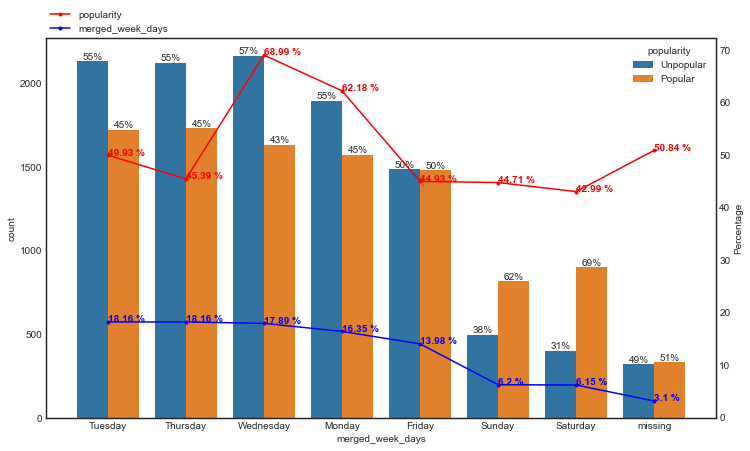

In [71]:
column = "merged_week_days"
plt.style.use('seaborn-white')
plt.figure(figsize=[12,7])
ax1=sns.countplot(column,hue='popularity',data=eda_data,  order = eda_data[column].value_counts().index)
barPerc(eda_data,column,ax1)
ax2 = ax1.twinx()
attr_rate =percentage(column,'popularity')
attr_rate.plot.line(style='.-', color='red', ax=ax2)
for index,data in enumerate(attr_rate.values):
    plt.text(x=index , y =data ,  color='red', fontweight='bold', s=f"{data} %" )

prop = round(eda_data[column].value_counts(normalize=True)*100,2)
prop.sort_index()
prop.plot.line(style='.-', color='blue', ax=ax2)
for index,data in enumerate(prop.values):
    plt.text(x=index , y =data ,  color='blue', fontweight='bold', s=f"{data} %" )
#ax1.legend(loc=[1,1])
ax2.legend(loc=[0,1])
ax2.set_ylabel("Percentage")
ax2.grid(False)


- Surprisingly, during the weekend articles do not receive much popularity, however the articles generally tend to be popular if published during weekends

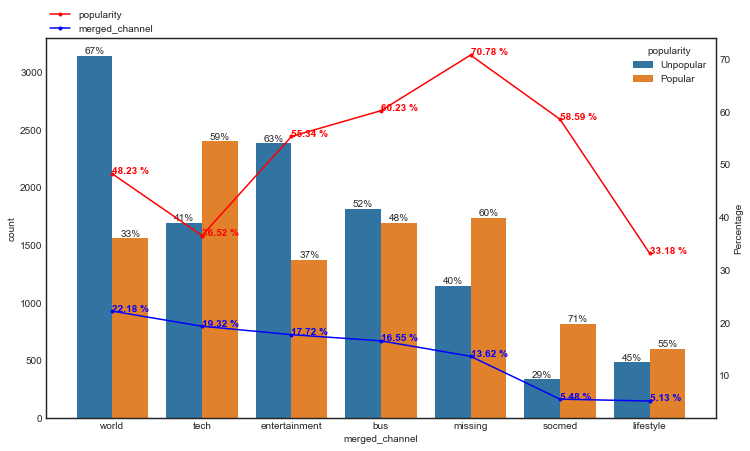

In [72]:
column = "merged_channel"
plt.style.use('seaborn-white')
plt.figure(figsize=[12,7])
ax1=sns.countplot(column,hue='popularity',data=eda_data,  order = eda_data[column].value_counts().index)
barPerc(eda_data,column,ax1)
ax2 = ax1.twinx()
attr_rate =percentage(column,'popularity')
attr_rate.plot.line(style='.-', color='red', ax=ax2)
for index,data in enumerate(attr_rate.values):
    plt.text(x=index , y =data ,  color='red', fontweight='bold', s=f"{data} %" )

prop = round(eda_data[column].value_counts(normalize=True)*100,2)
prop.sort_index()
prop.plot.line(style='.-', color='blue', ax=ax2)
for index,data in enumerate(prop.values):
    plt.text(x=index , y =data ,  color='blue', fontweight='bold', s=f"{data} %" )
#ax1.legend(loc=[1,1])
ax2.legend(loc=[0,1])
ax2.set_ylabel("Percentage")
ax2.grid(False)

- The articles belonging to socmed and lifestyle are low in number compared to other channels. 

<AxesSubplot:>

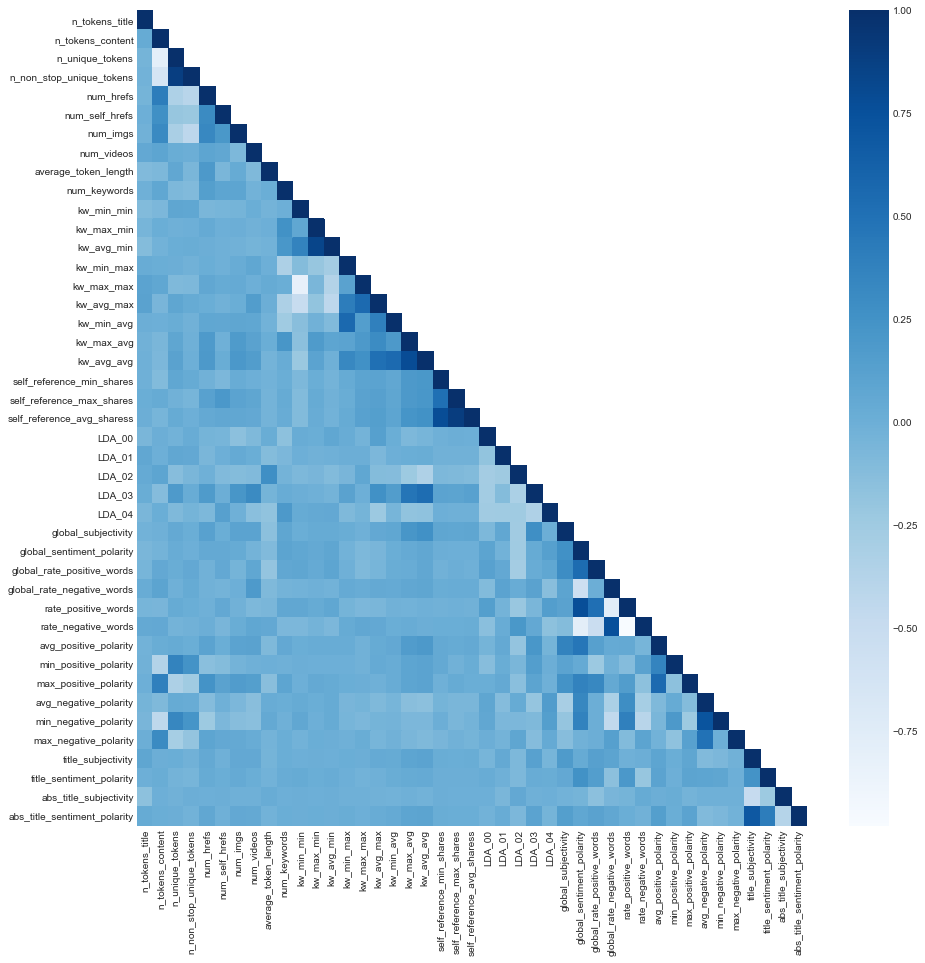

In [73]:
cor=eda_data[numeric_columns].corr()
#sns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [74]:
import numpy as np

# Create correlation matrix
corr_matrix = eda_data[numeric_columns].corr().abs() #creates 160*160 matrix by coverting -ve correlations to +ve values
#print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['rate_negative_words']


In [75]:
X_train_out_removed.drop(to_drop, axis=1, inplace=True)

In [76]:
X_train_out_removed.shape

(21181, 55)

# Step 4: Scaling Train Data

In [77]:
pt = PowerTransformer(method='yeo-johnson', standardize=True,) 

In [78]:
final_columns = list(X_train_out_removed.columns)
scale_num_cols= [col for col in final_columns if col in numeric_columns]
print(scale_num_cols)

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']


In [79]:
# plt.figure(figsize=(22,80))
# for i in (enumerate(scale_num_cols)): ## i is tuple which has key and column name pairs
#     plt.subplot(len(scale_num_cols)//4 + 4,4,i[0]+1)
#     sns.distplot(X_train_out_removed[i[1]],hist=True)

# plt.legend()
# plt.show()  

In [80]:
X_train_out_scaled=X_train_out_removed.copy()

In [81]:
X_train_out_scaled[scale_num_cols] = pt.fit_transform(X_train_out_removed[scale_num_cols])                 

In [82]:
# plt.figure(figsize=(22,80))
# for i in (enumerate(scale_num_cols)): ## i is tuple which has key and column name pairs
#     plt.subplot(len(scale_num_cols)//4 + 4,4,i[0]+1)
#     sns.distplot(X_train_out_scaled[i[1]],hist=True)

# plt.legend()
# plt.show()  

<AxesSubplot:ylabel='Density'>

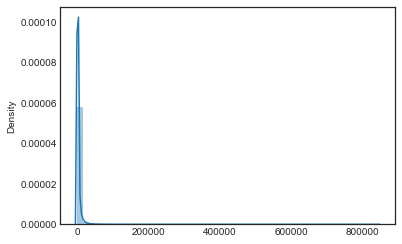

In [83]:
sns.distplot(y_train,hist=True)

<AxesSubplot:ylabel='Density'>

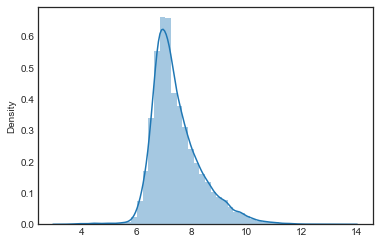

In [84]:
sns.distplot(np.log(y_train),hist=True)

In [85]:
y_train_scaled=np.log(y_train)

In [86]:
yt= PowerTransformer(method='yeo-johnson', standardize=True,) 

In [87]:
y_train_scaled_new= yt.fit_transform(y_train)   

<AxesSubplot:ylabel='Density'>

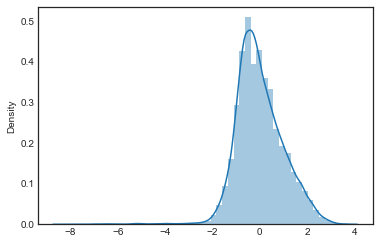

In [88]:
sns.distplot(y_train_scaled_new,hist=True)

# Step 5: Building Regression models on Train Data

### Feature selection

### Method 1:

In [89]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression

In [90]:
#Create a linear regression estimator 

linreg = LinearRegression()

#Use RFECV to pick best features, using Stratified Kfold
rfecv =   RFECV(linreg, cv=5, scoring='neg_mean_squared_error',verbose = 1,n_jobs=-1)

In [91]:

selector = rfecv.fit(X_train_out_scaled, y_train_scaled)
selector.support_

Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.


array([False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False])

In [92]:
selector.ranking_

array([11,  1,  1,  1,  1,  1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 13,  1,  4,  6,  7,  5, 15,  1, 10,  1, 14,  9,
        1,  1,  1,  8])

In [93]:
list(zip(X_train_out_scaled.columns,selector.support_,selector.ranking_))

[('n_tokens_title', False, 11),
 ('n_tokens_content', True, 1),
 ('n_unique_tokens', True, 1),
 ('n_non_stop_unique_tokens', True, 1),
 ('num_hrefs', True, 1),
 ('num_self_hrefs', True, 1),
 ('num_imgs', False, 2),
 ('num_videos', True, 1),
 ('average_token_length', False, 3),
 ('num_keywords', True, 1),
 ('data_channel_is_lifestyle', True, 1),
 ('data_channel_is_entertainment', True, 1),
 ('data_channel_is_bus', True, 1),
 ('data_channel_is_socmed', True, 1),
 ('data_channel_is_tech', True, 1),
 ('data_channel_is_world', True, 1),
 ('kw_min_min', True, 1),
 ('kw_max_min', True, 1),
 ('kw_avg_min', True, 1),
 ('kw_min_max', True, 1),
 ('kw_max_max', True, 1),
 ('kw_avg_max', True, 1),
 ('kw_min_avg', True, 1),
 ('kw_max_avg', True, 1),
 ('kw_avg_avg', True, 1),
 ('self_reference_min_shares', True, 1),
 ('self_reference_max_shares', True, 1),
 ('self_reference_avg_sharess', True, 1),
 ('weekday_is_monday', False, 12),
 ('weekday_is_tuesday', True, 1),
 ('weekday_is_wednesday', True, 1),

In [94]:
print("Optimal number of features from RFECV :")
print(selector.n_features_)

Optimal number of features from RFECV :
41


### Method 2: Feature selection  using RFE cross val

In [95]:
cv_scores =[]
total_cols = len(X_train_out_scaled.columns)

In [96]:
for features in range(10,60,10):
    rfe = RFE(linreg, features)
    scores = cross_val_score(rfe, X_train_out_scaled, y_train_scaled,cv= 5) # consists of array of 5 values for 5 folds at each iteration
    cv_scores.append(scores)

In [97]:
cv_scores

[array([0.115309  , 0.1236929 , 0.09410054, 0.13154571, 0.11149958]),
 array([0.13017123, 0.13816172, 0.11241651, 0.14270851, 0.12685672]),
 array([0.13272126, 0.14381266, 0.11240642, 0.14641954, 0.13514515]),
 array([0.1355191 , 0.14630251, 0.11532368, 0.14972645, 0.13538602]),
 array([0.135324  , 0.14730729, 0.11596663, 0.14965223, 0.13448886])]

In [98]:
mean_cv_score =[]
for score in cv_scores:
    mean_cv_score.append(score.mean())

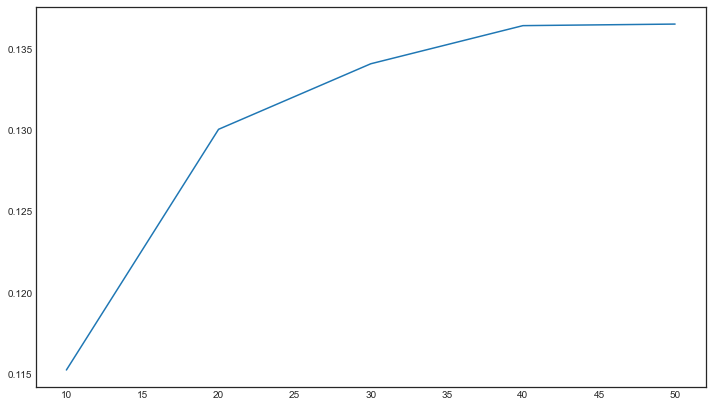

In [99]:
plt.figure(figsize=[12,7])
plt.plot(np.array(range(10,60,10)),mean_cv_score)

### Method 3: Feature Importance using DecisionTreeClassifier, RandomForestClassifier

<AxesSubplot:>

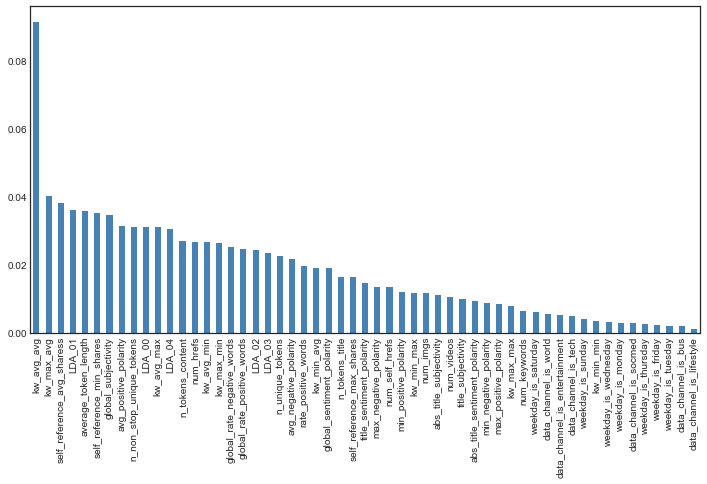

In [100]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train_out_scaled, y_train_scaled)

feat_imp = pd.Series(reg.feature_importances_, index=X_train_out_scaled.columns).sort_values(ascending=False)

feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

<AxesSubplot:>

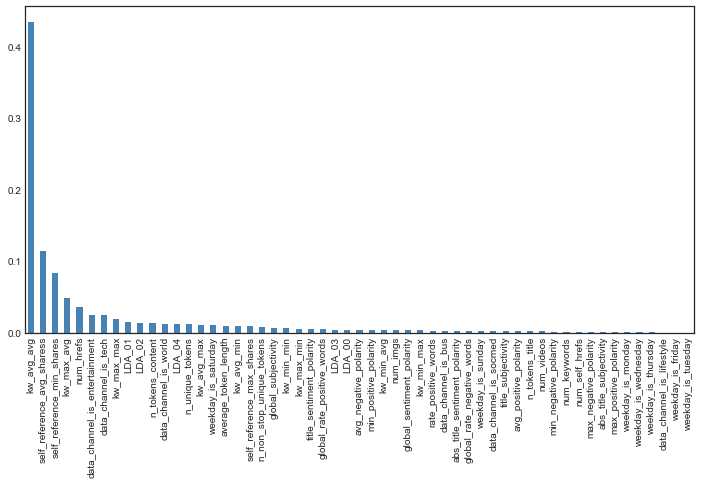

In [101]:
rand_reg = RandomForestRegressor(n_estimators = 100, max_depth=5)
rand_reg.fit(X_train_out_scaled, y_train_scaled)

rand_feat_imp = pd.Series(rand_reg.feature_importances_, index=X_train_out_scaled.columns).sort_values(ascending=False)

rand_feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

### Final Feature selection for our model

In [102]:
final_number_features = 30
rfe = RFE(linreg, final_number_features)
rfe.fit(X_train_out_scaled, y_train_scaled_new)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [103]:
rfe.support_

array([False,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [104]:
final_cols = list(X_train_out_scaled.columns[rfe.support_])
print(final_cols)

['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'global_subjectivity', 'min_positive_polarity']


In [105]:
import statsmodels.api as sm

In [106]:
X_train_col=X_train_out_scaled[final_cols]

In [107]:
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
20,self_reference_avg_sharess,24.46
13,kw_min_max,23.96
16,kw_min_avg,22.93
19,self_reference_max_shares,14.14
12,kw_avg_min,8.52
11,kw_max_min,6.70
0,n_tokens_content,6.12
18,self_reference_min_shares,6.08
1,n_unique_tokens,5.12
15,kw_avg_max,3.00


In [108]:
X_train_col.drop('self_reference_avg_sharess',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
13,kw_min_max,23.96
16,kw_min_avg,22.92
12,kw_avg_min,8.52
11,kw_max_min,6.70
0,n_tokens_content,6.12
1,n_unique_tokens,5.12
19,self_reference_max_shares,3.33
15,kw_avg_max,3.00
18,self_reference_min_shares,2.73
14,kw_max_max,2.67


In [109]:
X_train_col.drop('kw_min_max',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,kw_avg_min,8.48
11,kw_max_min,6.66
0,n_tokens_content,6.12
1,n_unique_tokens,5.12
18,self_reference_max_shares,3.33
14,kw_avg_max,2.98
17,self_reference_min_shares,2.73
13,kw_max_max,2.66
16,kw_avg_avg,2.42
9,data_channel_is_world,2.20


In [110]:
X_train_col.drop('kw_avg_min',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,n_tokens_content,6.11
1,n_unique_tokens,5.12
17,self_reference_max_shares,3.33
13,kw_avg_max,2.79
16,self_reference_min_shares,2.73
15,kw_avg_avg,2.41
12,kw_max_max,2.40
9,data_channel_is_world,2.19
10,kw_min_min,2.04
8,data_channel_is_tech,1.74


In [111]:
X_train_col.drop('n_tokens_content',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,self_reference_max_shares,3.32
12,kw_avg_max,2.79
15,self_reference_min_shares,2.69
11,kw_max_max,2.40
14,kw_avg_avg,2.40
8,data_channel_is_world,2.17
9,kw_min_min,2.04
7,data_channel_is_tech,1.74
2,num_self_hrefs,1.62
5,data_channel_is_entertainment,1.57


In [112]:
# selecting columns only which are 'True' in rfecv.support_ i.e True columns were selected for creating a model


X_train_1=sm.add_constant(X_train_col)    # Adding constant
X_train_1.shape

(21181, 27)

### Model 1

In [113]:
lm_1 = sm.OLS(y_train_scaled,X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:31:57   Log-Likelihood:                -26641.
No. Observations:               21181   AIC:                         5.334e+04
Df Residuals:                   21154   BIC:                         5.355e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [114]:
#Removing kw_max_min and building model
X_train_2=X_train_1.drop('kw_max_min', axis=1)   

### Model 2

In [115]:
lm_2 = sm.OLS(y_train_scaled,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:31:57   Log-Likelihood:                -26642.
No. Observations:               21181   AIC:                         5.334e+04
Df Residuals:                   21155   BIC:                         5.354e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [116]:
#Removing kw_max_min and building model
X_train_3=X_train_2.drop('kw_min_min', axis=1)   

### Model 3

In [117]:
lm_3 = sm.OLS(y_train_scaled,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:31:57   Log-Likelihood:                -26644.
No. Observations:               21181   AIC:                         5.334e+04
Df Residuals:                   21156   BIC:                         5.354e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [118]:
#Predict values
y_train_pred_scaled = lm_3.predict(X_train_3)

In [119]:
y_train_scaled_arr = y_train_scaled.values.ravel()
print(y_train_scaled_arr.shape)

(21181,)


In [120]:
res=y_train_scaled_arr- y_train_pred_scaled

In [121]:
res.head()

id
12722   -0.636178
19161    1.384146
17705   -0.054496
3394     0.048496
1416    -0.229519
dtype: float64

Text(0, 0.5, 'residual')

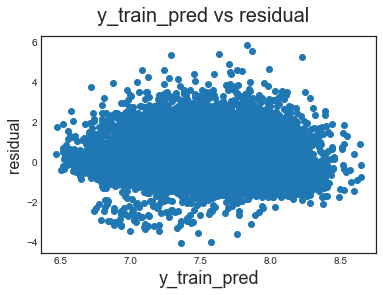

In [122]:
#CHECKING PREDICTED V/s RESIDUAL to check non linearity

fig = plt.figure()
plt.scatter(y_train_pred_scaled,res)
fig.suptitle('y_train_pred vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16) 

Text(0.5, 0, 'Errors')

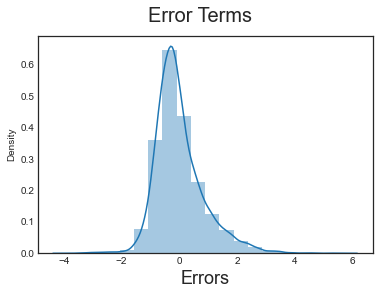

In [123]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Q-Q Plot for errors 

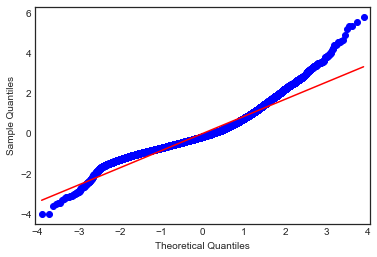

In [124]:
sm.qqplot(res,line='s')
plt.show()

In [125]:
residual_results=pd.DataFrame()

In [126]:
residual_results['Actual'] =y_train_scaled
residual_results['predicted'] = y_train_pred_scaled.values
residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
residual_results['shares']=y_train.values
residual_results['predicted_shares'] = np.exp(y_train_pred_scaled)

In [127]:
residual_results.head()

,Actual,predicted,residual,shares,predicted_shares
id,,,,,
12722,6.565265,7.201443,-0.636178,710,1341.364428
19161,9.717158,8.333012,1.384146,16600,4158.927173
17705,7.170120,7.224616,-0.054496,1300,1372.810953
3394,7.377759,7.329263,0.048496,1600,1524.258394
1416,7.170120,7.399638,-0.229519,1300,1635.392571


In [128]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [129]:
regression_results(residual_results['shares'].values, residual_results['predicted_shares'].values)

explained_variance:  0.0109
r2:  -0.0033
MAE:  2298.3065
MSE:  150712461.5449
RMSE:  12276.5004


In [130]:
regression_results(residual_results['Actual'].values, residual_results['predicted'].values)

explained_variance:  0.1367
r2:  0.1367
MAE:  0.6296
MSE:  0.7247
RMSE:  0.8513


In [131]:
imp_columns = ['n_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_videos',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'LDA_00', 'global_subjectivity', 'min_positive_polarity']

## Polynomial Regression

In [132]:
X_train_scaled_polynomial = X_train_out_scaled.copy()

In [133]:
X_train_scaled_polynomial = X_train_scaled_polynomial[imp_columns]

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [135]:
poly = PolynomialFeatures(2)
X_train_scaled_polynomial= poly.fit_transform(X_train_scaled_polynomial)
X_train_scaled_polynomial = pd.DataFrame(X_train_scaled_polynomial, columns = poly.get_feature_names(imp_columns))

In [136]:
X_train_scaled_polynomial.head()

,1,n_unique_tokens,num_hrefs,num_self_hrefs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_max,kw_avg_max,kw_min_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,global_subjectivity,min_positive_polarity,n_unique_tokens^2,n_unique_tokens num_hrefs,n_unique_tokens num_self_hrefs,n_unique_tokens num_videos,n_unique_tokens data_channel_is_lifestyle,n_unique_tokens data_channel_is_entertainment,n_unique_tokens data_channel_is_socmed,n_unique_tokens data_channel_is_tech,n_unique_tokens data_channel_is_world,n_unique_tokens kw_max_max,n_unique_tokens kw_avg_max,n_unique_tokens kw_min_avg,n_unique_tokens kw_avg_avg,n_unique_tokens self_reference_min_shares,n_unique_tokens self_reference_max_shares,n_unique_tokens weekday_is_tuesday,n_unique_tokens weekday_is_wednesday,n_unique_tokens weekday_is_thursday,n_unique_tokens weekday_is_friday,n_unique_tokens weekday_is_saturday,n_unique_tokens weekday_is_sunday,n_unique_tokens LDA_00,n_unique_tokens global_subjectivity,n_unique_tokens min_positive_polarity,num_hrefs^2,num_hrefs num_self_hrefs,num_hrefs num_videos,num_hrefs data_channel_is_lifestyle,num_hrefs data_channel_is_entertainment,num_hrefs data_channel_is_socmed,num_hrefs data_channel_is_tech,num_hrefs data_channel_is_world,num_hrefs kw_max_max,num_hrefs kw_avg_max,num_hrefs kw_min_avg,num_hrefs kw_avg_avg,num_hrefs self_reference_min_shares,num_hrefs self_reference_max_shares,num_hrefs weekday_is_tuesday,num_hrefs weekday_is_wednesday,num_hrefs weekday_is_thursday,num_hrefs weekday_is_friday,num_hrefs weekday_is_saturday,num_hrefs weekday_is_sunday,num_hrefs LDA_00,num_hrefs global_subjectivity,num_hrefs min_positive_polarity,num_self_hrefs^2,num_self_hrefs num_videos,num_self_hrefs data_channel_is_lifestyle,num_self_hrefs data_channel_is_entertainment,num_self_hrefs data_channel_is_socmed,num_self_hrefs data_channel_is_tech,num_self_hrefs data_channel_is_world,num_self_hrefs kw_max_max,num_self_hrefs kw_avg_max,num_self_hrefs kw_min_avg,num_self_hrefs kw_avg_avg,num_self_hrefs self_reference_min_shares,num_self_hrefs self_reference_max_shares,num_self_hrefs weekday_is_tuesday,num_self_hrefs weekday_is_wednesday,num_self_hrefs weekday_is_thursday,num_self_hrefs weekday_is_friday,num_self_hrefs weekday_is_saturday,num_self_hrefs weekday_is_sunday,num_self_hrefs LDA_00,num_self_hrefs global_subjectivity,num_self_hrefs min_positive_polarity,num_videos^2,num_videos data_channel_is_lifestyle,num_videos data_channel_is_entertainment,num_videos data_channel_is_socmed,num_videos data_channel_is_tech,num_videos data_channel_is_world,num_videos kw_max_max,num_videos kw_avg_max,num_videos kw_min_avg,num_videos kw_avg_avg,num_videos self_reference_min_shares,num_videos self_reference_max_shares,num_videos weekday_is_tuesday,num_videos weekday_is_wednesday,num_videos weekday_is_thursday,num_videos weekday_is_friday,num_videos weekday_is_saturday,num_videos weekday_is_sunday,num_videos LDA_00,num_videos global_subjectivity,num_videos min_positive_polarity,data_channel_is_lifestyle^2,data_channel_is_lifestyle data_channel_is_entertainment,data_channel_is_lifestyle data_channel_is_socmed,data_channel_is_lifestyle data_channel_is_tech,data_channel_is_lifestyle data_channel_is_world,data_channel_is_lifestyle kw_max_max,data_channel_is_lifestyle kw_avg_max,data_channel_is_lifestyle kw_min_avg,data_channel_is_lifestyle kw_avg_avg,data_channel_is_lifestyle self_reference_min_shares,data_channel_is_lifestyle self_reference_max_shares,data_channel_is_lifestyle weekday_is_tuesday,data_channel_is_lifestyle weekday_is_wednesday,data_channel_is_lifestyle weekday_is_thursday,data_channel_is_lifestyle weekday_is_friday,data_channel_is_lifestyle weekday_is_saturday,data_channel_is_lifestyle weekday_is_sunday,data_channel_is_lifest

In [137]:
params = {'alpha': [ 0.001, 0.01]}

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs = -1,
                        verbose = 1)            

lasso_model_cv.fit(X_train_scaled_polynomial, y_train_scaled) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01]}, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [138]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


In [139]:
lasso_best = lasso_model_cv.best_estimator_

In [140]:
y_train_lasso_pred = lasso_best.predict(X_train_scaled_polynomial)

In [141]:
lasso_res=y_train_scaled_arr- y_train_lasso_pred
lasso_res[:5]

array([-0.62160856,  1.4383499 ,  0.04689864,  0.1267358 , -0.13420065])

Text(0, 0.5, 'residual')

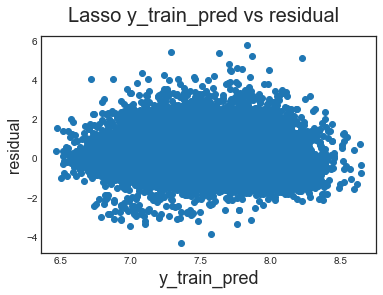

In [142]:
#CHECKING PREDICTED V/s RESIDUAL to check non linearity

fig = plt.figure()
plt.scatter(y_train_pred_scaled,lasso_res)
fig.suptitle('Lasso y_train_pred vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16) 

Text(0.5, 0, 'Errors')

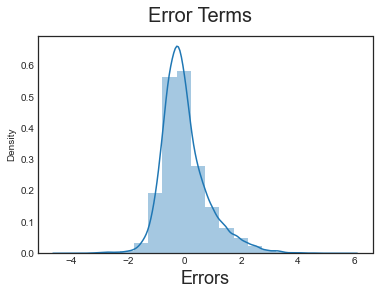

In [143]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((lasso_res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



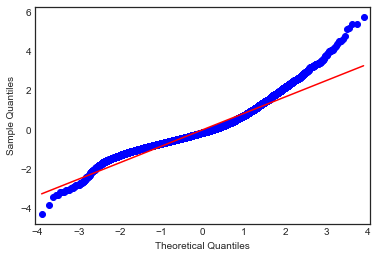

In [144]:
sm.qqplot(lasso_res,line='s')
plt.show()

In [145]:

lasso_residual_results=pd.DataFrame()
lasso_residual_results['Actual'] =y_train_scaled
lasso_residual_results['predicted'] = y_train_lasso_pred
lasso_residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
lasso_residual_results['shares']=y_train.values
lasso_residual_results['predicted_shares'] = np.exp(y_train_lasso_pred)

lasso_residual_results.head()


,Actual,predicted,residual,shares,predicted_shares
id,,,,,
12722,6.565265,7.186874,-0.636178,710,1321.963658
19161,9.717158,8.278808,1.384146,16600,3939.495979
17705,7.170120,7.123221,-0.054496,1300,1240.439346
3394,7.377759,7.251023,0.048496,1600,1409.546233
1416,7.170120,7.304320,-0.229519,1300,1486.708938


In [146]:
regression_results(lasso_residual_results['shares'].values, lasso_residual_results['predicted_shares'].values)


explained_variance:  0.0142
r2:  0.0004
MAE:  2274.0656
MSE:  150160032.4065
RMSE:  12253.9803


In [147]:

regression_results(lasso_residual_results['Actual'].values, lasso_residual_results['predicted'].values)



explained_variance:  0.1672
r2:  0.1672
MAE:  0.6158
MSE:  0.6991
RMSE:  0.8361


In [148]:

def plot_errors(model,X_input, y_actual, title):
    y_train_pred = model.predict(X_input)
    try:
        residu=y_actual.values.ravel()- y_train_pred.ravel() ##can use reshape(-1,1) instead of ravel to covert to (n,)
    except:
        residu=y_actual.values.ravel()- y_train_pred.values

    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3,figsize=(16,4))

    ax1.scatter(y_train_pred,residu)
    ax1.set_xlabel('y_pred')                          # X-label
    ax1.set_ylabel('residual') 
    ax1.set_title('y_pred vs residual')

    sns.distplot((residu), bins = 20,ax=ax2)
    ax2.set_xlabel('Errors')                         # X-label
    ax2.set_title('Density plot of residuals')

    sm.qqplot(residu,line='s',ax=ax3)
    ax3.set_title('QQ Plot')
    plt.suptitle(title)
    plt.show()



In [149]:

def residual_errors(model,X_input, y_actual):
    y_train_pred = model.predict(X_input)
    residual_results=pd.DataFrame()
    residual_results['Actual'] =y_actual.values.ravel()
    residual_results['predicted'] = y_train_pred.ravel()
    residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
    residual_results['shares']= np.exp(y_actual.values.ravel())
    residual_results['predicted_shares'] = np.exp(y_train_pred)
    residual_results.index = X_input.index
    return residual_results

In [150]:
def regression_metrics(df, model):
    print("Regression results in log space        : ", model, "\n")
    regression_results(df['Actual'].values, df['predicted'].values)
    print("\n")
    print("Regression results for actual shares   : ", model, "\n")
    regression_results(df['shares'].values, df['predicted_shares'].values)

In [151]:
X_train_3.columns

Index(['const', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_videos',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'LDA_00', 'global_subjectivity', 'min_positive_polarity'],
      dtype='object')

## XG Boost regression on whole dataset

In [152]:
from xgboost import XGBRegressor

xgbr_pipeline = Pipeline([("xgbr_model", XGBRegressor(objective="reg:squarederror", verbosity=1, 
                                                      random_state=42, n_jobs=-1))])

xgbr_pipeline_params = {
                        "xgbr_model__max_depth": [5],
                        "xgbr_model__learning_rate": [0.01,0.1],
                    }

xgbr_grid_pipeline = GridSearchCV(xgbr_pipeline, xgbr_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
xgbr_grid_pipeline.fit(X_train_out_scaled[imp_columns],y_train_scaled)
print(xgbr_grid_pipeline.best_params_)
xgbr_model = xgbr_grid_pipeline.best_estimator_
print(xgbr_grid_pipeline.best_score_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'xgbr_model__learning_rate': 0.1, 'xgbr_model__max_depth': 5}
-0.711899202213718


In [153]:
y_train_pred_xgbr = xgbr_model.predict(X_train_out_scaled[imp_columns])

In [154]:
y_train_pred_xgbr[:5]

array([7.2489877, 8.623539 , 7.0675907, 7.261303 , 7.34287  ],
      dtype=float32)

In [155]:
xgbr_residual = pd.DataFrame()
xgbr_residual['Actual'] = y_train_scaled_new.ravel()
xgbr_residual['predicted'] = y_train_pred_xgbr
xgbr_residual['residual'] = xgbr_residual['Actual'] - xgbr_residual['predicted']
xgbr_residual['shares'] = y_train['shares'].values
xgbr_residual['predicted_shares'] = np.exp(y_train_pred_xgbr)#yt.inverse_transform(y_train_pred_xgbr[:,np.newaxis]).ravel()
xgbr_residual.head()

,Actual,predicted,residual,shares,predicted_shares
0,-1.040542,7.248988,-8.289530,710,1406.680054
1,2.112260,8.623539,-6.511279,16600,5561.031738
2,-0.221876,7.067591,-7.289467,1300,1173.317749
3,0.030999,7.261303,-7.230304,1600,1424.110840
4,-0.221876,7.342870,-7.564746,1300,1545.140625


In [156]:
#(125,1) - column vector, (125,)- array

### KNN  Regression on imp columns

In [157]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsRegressor


knn_pipeline = Pipeline([("knn", KNeighborsRegressor())])

knn_pipeline_params = {'knn__n_neighbors': list(range(40,62,4))}

knn_grid_pipeline = GridSearchCV(knn_pipeline, knn_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
knn_grid_pipeline.fit(X_train_out_scaled[imp_columns], y_train_scaled)
print(knn_grid_pipeline.best_params_)
knn_model = knn_grid_pipeline.best_estimator_
print(knn_grid_pipeline.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'knn__n_neighbors': 40}
-0.7425297910871109


In [158]:
y_train_pred_knn = knn_model.predict(X_train_out_scaled[imp_columns])

In [159]:
y_train_pred_knn[:5]

array([[7.30680822],
       [8.4839269 ],
       [7.13922196],
       [7.14108605],
       [7.22582807]])

In [160]:
knn_residual = pd.DataFrame()
knn_residual['Actual'] = y_train_scaled.values.ravel()
knn_residual['predicted'] = y_train_pred_knn
knn_residual['residual'] = knn_residual['Actual'] - knn_residual['predicted']
knn_residual['shares'] = y_train['shares'].values
knn_residual['predicted_shares'] = np.exp(y_train_pred_knn)#yt.inverse_transform(y_train_pred_xgbr[:,np.newaxis]).ravel()
knn_residual.head()

,Actual,predicted,residual,shares,predicted_shares
0,6.565265,7.306808,-0.741543,710,1490.412524
1,9.717158,8.483927,1.233231,16600,4836.404740
2,7.170120,7.139222,0.030898,1300,1260.447325
3,7.377759,7.141086,0.236673,1600,1262.799111
4,7.170120,7.225828,-0.055709,1300,1374.476302


### random forest regressor

In [161]:
from sklearn.feature_selection import SelectFromModel

rf_pipeline = Pipeline([("rfr", RandomForestRegressor(criterion='mse', random_state=100, max_features='sqrt',n_jobs=-1,verbose=1))])

rf_pipeline_params = {"rfr__n_estimators":[100,200],
           "rfr__max_leaf_nodes":[30,60],
            "rfr__bootstrap":[True ,False]}

rf_grid_pipeline = GridSearchCV(rf_pipeline, rf_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
rf_grid_pipeline.fit(X_train_out_scaled[imp_columns], y_train_scaled)
print(rf_grid_pipeline.best_params_)
rf_model = rf_grid_pipeline.best_estimator_
print(rf_grid_pipeline.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


{'rfr__bootstrap': False, 'rfr__max_leaf_nodes': 60, 'rfr__n_estimators': 200}
-0.7313593042334331


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished


In [162]:
y_train_pred_rf = rf_model.predict(X_train_out_scaled[imp_columns])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [163]:
rf_residual = pd.DataFrame()
rf_residual['Actual'] = y_train_scaled.values.ravel()
rf_residual['predicted'] = y_train_pred_rf
rf_residual['residual'] = rf_residual['Actual'] - rf_residual['predicted']
rf_residual['shares'] = y_train['shares'].values
rf_residual['predicted_shares'] = np.exp(y_train_pred_rf)#yt.inverse_transform(y_train_pred_xgbr[:,np.newaxis]).ravel()
rf_residual.head()

,Actual,predicted,residual,shares,predicted_shares
0,6.565265,7.300986,-0.735721,710,1481.759919
1,9.717158,8.061781,1.655377,16600,3170.931758
2,7.170120,7.137182,0.032938,1300,1257.878075
3,7.377759,7.390477,-0.012718,1600,1620.478757
4,7.170120,7.319661,-0.149542,1300,1509.692679


## SVR Regressor

In [164]:
from sklearn.svm import SVR

In [165]:
svr_pipeline = Pipeline([("svr", SVR(kernel='rbf'))])
svr_pipeline_params = {"svr__C":[0.01, 0.1]}

svr_grid_pipeline = GridSearchCV(svr_pipeline, svr_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
svr_grid_pipeline.fit(X_train_out_scaled[imp_columns], y_train_scaled)
print(svr_grid_pipeline.best_params_)
svr_model = svr_grid_pipeline.best_estimator_
print(svr_grid_pipeline.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'svr__C': 0.1}
-0.7402254421139292


# Step 8: Making Predictions on Test Dataset

In [166]:
print(X_test.shape)
print(y_test.shape)

(5947, 58)
(5947, 1)


In [167]:
X_test[impute_cols] = imp.transform(X_test[impute_cols])

In [168]:
X_test_out_scaled=X_test.copy()

In [169]:
X_test_out_scaled[scale_num_cols] = pt.fit_transform(X_test_out_scaled[scale_num_cols])     

In [170]:
y_test_scaled=np.log(y_test)

In [171]:
X_test_out_scaled=X_test_out_scaled[X_train_out_scaled.columns]

In [172]:
X_test_out_scaled.shape

(5947, 55)

In [173]:
y_test_scaled.shape

(5947, 1)

## Linear Regression Model


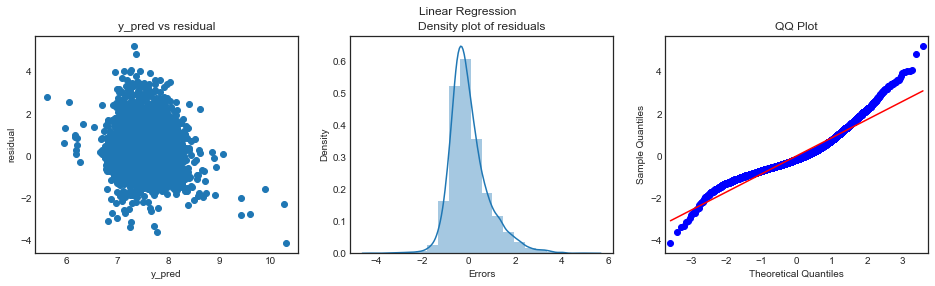

In [174]:
plot_errors(lm_3, sm.add_constant(X_test_out_scaled)[X_train_3.columns], y_test_scaled, 'Linear Regression')

In [175]:
test_residual_results_lr = residual_errors(lm_3, sm.add_constant(X_test_out_scaled)[X_train_3.columns], y_test_scaled)

In [176]:
test_residual_results_lr['predicted_shares'] = np.exp(test_residual_results_lr['predicted'].values)

In [177]:
regression_metrics(test_residual_results_lr, 'Linear Regression')

Regression results in log space        :  Linear Regression 

explained_variance:  0.1043
r2:  0.1041
MAE:  0.6327
MSE:  0.7363
RMSE:  0.8581


Regression results for actual shares   :  Linear Regression 

explained_variance:  0.0086
r2:  -0.0219
MAE:  2204.9424
MSE:  61128879.1532
RMSE:  7818.496


In [178]:
test_residual_results_lr.head()

,Actual,predicted,residual,shares,predicted_shares
id,,,,,
7812,7.003065,7.649001,-0.645935,1100.0,2098.547829
5143,6.740519,6.973227,-0.232708,846.0,1067.662595
17162,7.003065,7.427092,-0.424027,1100.0,1680.912877
7573,8.039157,7.635410,0.403747,3100.0,2070.219623
27622,8.101678,7.466232,0.635445,3300.0,1748.008446


## Lasso Regression with polynomial features

In [179]:
X_test_scaled_polynomial= poly.transform(X_test_out_scaled[imp_columns])

In [180]:
X_test_scaled_polynomial = X_test_scaled_polynomial

In [181]:
X_test_scaled_polynomial = pd.DataFrame(X_test_scaled_polynomial, columns = poly.get_feature_names(imp_columns))

In [182]:
X_test_scaled_polynomial.shape

(5947, 325)

In [183]:
X_test_scaled_polynomial.head()

,1,n_unique_tokens,num_hrefs,num_self_hrefs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_max,kw_avg_max,kw_min_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,global_subjectivity,min_positive_polarity,n_unique_tokens^2,n_unique_tokens num_hrefs,n_unique_tokens num_self_hrefs,n_unique_tokens num_videos,n_unique_tokens data_channel_is_lifestyle,n_unique_tokens data_channel_is_entertainment,n_unique_tokens data_channel_is_socmed,n_unique_tokens data_channel_is_tech,n_unique_tokens data_channel_is_world,n_unique_tokens kw_max_max,n_unique_tokens kw_avg_max,n_unique_tokens kw_min_avg,n_unique_tokens kw_avg_avg,n_unique_tokens self_reference_min_shares,n_unique_tokens self_reference_max_shares,n_unique_tokens weekday_is_tuesday,n_unique_tokens weekday_is_wednesday,n_unique_tokens weekday_is_thursday,n_unique_tokens weekday_is_friday,n_unique_tokens weekday_is_saturday,n_unique_tokens weekday_is_sunday,n_unique_tokens LDA_00,n_unique_tokens global_subjectivity,n_unique_tokens min_positive_polarity,num_hrefs^2,num_hrefs num_self_hrefs,num_hrefs num_videos,num_hrefs data_channel_is_lifestyle,num_hrefs data_channel_is_entertainment,num_hrefs data_channel_is_socmed,num_hrefs data_channel_is_tech,num_hrefs data_channel_is_world,num_hrefs kw_max_max,num_hrefs kw_avg_max,num_hrefs kw_min_avg,num_hrefs kw_avg_avg,num_hrefs self_reference_min_shares,num_hrefs self_reference_max_shares,num_hrefs weekday_is_tuesday,num_hrefs weekday_is_wednesday,num_hrefs weekday_is_thursday,num_hrefs weekday_is_friday,num_hrefs weekday_is_saturday,num_hrefs weekday_is_sunday,num_hrefs LDA_00,num_hrefs global_subjectivity,num_hrefs min_positive_polarity,num_self_hrefs^2,num_self_hrefs num_videos,num_self_hrefs data_channel_is_lifestyle,num_self_hrefs data_channel_is_entertainment,num_self_hrefs data_channel_is_socmed,num_self_hrefs data_channel_is_tech,num_self_hrefs data_channel_is_world,num_self_hrefs kw_max_max,num_self_hrefs kw_avg_max,num_self_hrefs kw_min_avg,num_self_hrefs kw_avg_avg,num_self_hrefs self_reference_min_shares,num_self_hrefs self_reference_max_shares,num_self_hrefs weekday_is_tuesday,num_self_hrefs weekday_is_wednesday,num_self_hrefs weekday_is_thursday,num_self_hrefs weekday_is_friday,num_self_hrefs weekday_is_saturday,num_self_hrefs weekday_is_sunday,num_self_hrefs LDA_00,num_self_hrefs global_subjectivity,num_self_hrefs min_positive_polarity,num_videos^2,num_videos data_channel_is_lifestyle,num_videos data_channel_is_entertainment,num_videos data_channel_is_socmed,num_videos data_channel_is_tech,num_videos data_channel_is_world,num_videos kw_max_max,num_videos kw_avg_max,num_videos kw_min_avg,num_videos kw_avg_avg,num_videos self_reference_min_shares,num_videos self_reference_max_shares,num_videos weekday_is_tuesday,num_videos weekday_is_wednesday,num_videos weekday_is_thursday,num_videos weekday_is_friday,num_videos weekday_is_saturday,num_videos weekday_is_sunday,num_videos LDA_00,num_videos global_subjectivity,num_videos min_positive_polarity,data_channel_is_lifestyle^2,data_channel_is_lifestyle data_channel_is_entertainment,data_channel_is_lifestyle data_channel_is_socmed,data_channel_is_lifestyle data_channel_is_tech,data_channel_is_lifestyle data_channel_is_world,data_channel_is_lifestyle kw_max_max,data_channel_is_lifestyle kw_avg_max,data_channel_is_lifestyle kw_min_avg,data_channel_is_lifestyle kw_avg_avg,data_channel_is_lifestyle self_reference_min_shares,data_channel_is_lifestyle self_reference_max_shares,data_channel_is_lifestyle weekday_is_tuesday,data_channel_is_lifestyle weekday_is_wednesday,data_channel_is_lifestyle weekday_is_thursday,data_channel_is_lifestyle weekday_is_friday,data_channel_is_lifestyle weekday_is_saturday,data_channel_is_lifestyle weekday_is_sunday,data_channel_is_lifest

In [184]:
lasso_best

Lasso(alpha=0.001)

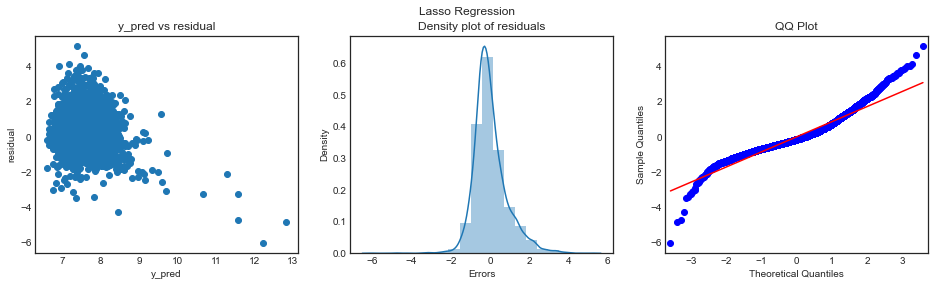

In [185]:
plot_errors(lasso_best, X_test_scaled_polynomial, y_test_scaled, 'Lasso Regression')

In [186]:
test_residual_results_lasso = residual_errors(lasso_best, X_test_scaled_polynomial, y_test_scaled)

In [187]:
regression_metrics(test_residual_results_lasso, 'Linear Regression')

Regression results in log space        :  Linear Regression 

explained_variance:  0.1
r2:  0.0998
MAE:  0.6261
MSE:  0.7399
RMSE:  0.8602


Regression results for actual shares   :  Linear Regression 

explained_variance:  -0.5715
r2:  -0.595
MAE:  2335.7665
MSE:  95416919.7465
RMSE:  9768.1585


## XGBR Regression on whole dataset

In [188]:
y_test_pred_xgbr = xgbr_model.predict(X_test_out_scaled[imp_columns])

In [190]:
test_xgbr_residual = pd.DataFrame()
test_xgbr_residual['Actual'] = y_test_scaled.values.ravel()
test_xgbr_residual['predicted'] = y_test_pred_xgbr
test_xgbr_residual['residual'] = test_xgbr_residual['Actual'] - test_xgbr_residual['predicted']
test_xgbr_residual['shares'] = y_test['shares'].values
test_xgbr_residual['predicted_shares'] = np.exp(y_test_pred_xgbr)#yt.inverse_transform(y_test_pred_xgbr[:,np.newaxis]).ravel()
test_xgbr_residual.head()

,Actual,predicted,residual,shares,predicted_shares
0,7.003065,7.698366,-0.695300,1100,2204.741699
1,6.740519,6.953938,-0.213419,846,1047.265747
2,7.003065,7.504344,-0.501279,1100,1815.913574
3,8.039157,7.535831,0.503326,3100,1874.001831
4,8.101678,7.447773,0.653905,3300,1716.036377


In [191]:
## kNN Regressor

In [192]:
y_test_pred_knn = knn_model.predict(X_test_out_scaled[imp_columns])

In [194]:
test_knn_residual = pd.DataFrame()
test_knn_residual['Actual'] = y_test_scaled.values.ravel()
test_knn_residual['predicted'] = y_test_pred_knn
test_knn_residual['residual'] = test_knn_residual['Actual'] - test_knn_residual['predicted']
test_knn_residual['shares'] = y_test['shares'].values
test_knn_residual['predicted_shares'] = np.exp(y_test_pred_knn).ravel()
test_knn_residual.head()

,Actual,predicted,residual,shares,predicted_shares
0,7.003065,7.484753,-0.481687,1100,1780.683761
1,6.740519,7.146262,-0.405743,846,1269.352543
2,7.003065,7.251863,-0.248797,1100,1410.730182
3,8.039157,7.472327,0.566830,3100,1758.694490
4,8.101678,7.512923,0.588755,3300,1831.558602


## Random Forest Regressor

In [196]:
y_test_pred_rf = rf_model.predict(X_test_out_scaled[imp_columns])

test_rf_residual = pd.DataFrame()
test_rf_residual['Actual'] = y_test_scaled.values.ravel()
test_rf_residual['predicted'] = y_test_pred_rf
test_rf_residual['residual'] = test_rf_residual['Actual'] - test_rf_residual['predicted']
test_rf_residual['shares'] = y_test['shares'].values
test_rf_residual['predicted_shares'] = np.exp(y_test_pred_rf).ravel()
test_rf_residual.head()



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


,Actual,predicted,residual,shares,predicted_shares
0,7.003065,7.724840,-0.721774,1100,2263.890155
1,6.740519,7.021641,-0.281121,846,1120.623895
2,7.003065,7.498878,-0.495812,1100,1806.014305
3,8.039157,7.438970,0.600187,3100,1700.997865
4,8.101678,7.467615,0.634063,3300,1750.427294


## SVR Regression`

In [198]:
y_test_pred_svr = svr_model.predict(X_test_out_scaled[imp_columns])

test_svr_residual = pd.DataFrame()
test_svr_residual['Actual'] = y_test_scaled.values.ravel()
test_svr_residual['predicted'] = y_test_pred_svr
test_svr_residual['residual'] = test_svr_residual['Actual'] - test_svr_residual['predicted']
test_svr_residual['shares'] = y_test['shares'].values
test_svr_residual['predicted_shares'] = np.exp(y_test_pred_svr).ravel()
test_svr_residual.head()



,Actual,predicted,residual,shares,predicted_shares
0,7.003065,7.344328,-0.341262,1100,1547.394089
1,6.740519,6.859093,-0.118573,846,952.502559
2,7.003065,7.254237,-0.251171,1100,1414.083357
3,8.039157,7.363310,0.675847,3100,1577.048377
4,8.101678,7.433722,0.667956,3300,1692.093534


## Stacking

In [201]:
stacking = pd.DataFrame()
stacking['lr']     = test_residual_results_lr['predicted'].values
stacking['lasso']  = test_residual_results_lasso['predicted'].values
stacking['xgbr']   = test_xgbr_residual['predicted'].values
stacking['rf']     = test_rf_residual['predicted'].values
stacking['knn']    = test_knn_residual['predicted'].values
stacking['svr']    = test_svr_residual['predicted'].values
stacking['actual'] = test_rf_residual['Actual']

In [202]:
stacking.head()

,lr,lasso,xgbr,rf,knn,svr,actual
0,7.649001,7.670422,7.698366,7.724840,7.484753,7.344328,7.003065
1,6.973227,6.888569,6.953938,7.021641,7.146262,6.859093,6.740519
2,7.427092,7.404299,7.504344,7.498878,7.251863,7.254237,7.003065
3,7.635410,7.479263,7.535831,7.438970,7.472327,7.363310,8.039157
4,7.466232,7.439136,7.447773,7.467615,7.512923,7.433722,8.101678


In [203]:
from sklearn.linear_model import ElasticNet

In [205]:
stack_pipeline = Pipeline([("elasticnet", ElasticNet(random_state=0))])

stack_pipeline_params = {'elasticnet__l1_ratio':[0,0.2,0.5,0.8,1],
                            'elasticnet__alpha':[0.001,0.01,0.1,],
                           'elasticnet__fit_intercept':[True,False]}

stack_grid_pipeline = GridSearchCV(stack_pipeline, stack_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
stack_grid_pipeline.fit(stacking[['lr','lasso','xgbr','rf','knn', 'svr']],stacking['actual'])
print(stack_grid_pipeline.best_params_)
stack_model = stack_grid_pipeline.best_estimator_
print(stack_grid_pipeline.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'elasticnet__alpha': 0.001, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 1}
-0.7063139917330024


# Step 10: Final Submission

In [206]:
from sklearn.linear_model import ElasticNet

## Applying models on unseen data

In [207]:
unseen.shape

(9911, 60)

In [208]:
X_unseen = unseen.copy()
X_unseen = X_unseen.set_index('id')
X_unseen.head()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


In [209]:
X_unseen[impute_cols] = imp.transform(X_unseen[impute_cols])


In [210]:
X_unseen_out_scaled = X_unseen.copy()

In [211]:
X_unseen_out_scaled[scale_num_cols] = pt.fit_transform(X_unseen_out_scaled[scale_num_cols])     
X_unseen_out_scaled=X_unseen_out_scaled[X_train_out_scaled.columns]
X_unseen_out_scaled.shape


(9911, 55)

### Linear Regression submission 

In [212]:
linear_results =pd.DataFrame()
linear_results['lr']=  lm_3.predict(sm.add_constant(X_unseen_out_scaled)[X_train_3.columns])

In [213]:
submission_2_lr = pd.DataFrame()
submission_2_lr['id'] = X_unseen_out_scaled.index
submission_2_lr['shares'] = np.exp(linear_results.lr.values)

In [214]:
submission_2_lr.head()

,id,shares
0,29733,1724.912958
1,29734,1829.396411
2,29735,1003.102817
3,29736,1697.895806
4,29737,1715.081063


In [215]:
submission_2_lr.to_csv("submission_2_lr.csv", index=False)

### lasso regression with polynomial features submission

In [216]:
X_unseen_scaled_polynomial= poly.transform(X_unseen_out_scaled[imp_columns])

X_unseen_scaled_polynomial = pd.DataFrame(X_unseen_scaled_polynomial, columns = poly.get_feature_names(imp_columns))



In [217]:
lasso_results =pd.DataFrame()
lasso_results['lasso']=  lasso_best.predict(X_unseen_scaled_polynomial)

In [218]:
submission_3_lasso = pd.DataFrame()
submission_3_lasso['id'] = X_unseen_out_scaled.index
submission_3_lasso['shares'] = np.exp(lasso_results.lasso.values)

In [219]:
submission_3_lasso.head()

,id,shares
0,29733,1669.678996
1,29734,1994.151068
2,29735,1435.236180
3,29736,1569.721403
4,29737,1825.619592


In [220]:
submission_3_lasso.to_csv("submission_3_lasso.csv", index=False)

## XGBR on unseen dataset

In [221]:
y_unseen_pred_xgbr = xgbr_model.predict(X_unseen_out_scaled[imp_columns])

In [222]:
submission_xgbr = pd.DataFrame()
submission_xgbr['id'] = X_unseen_out_scaled.index
submission_xgbr['shares'] = np.exp(y_unseen_pred_xgbr)#yt.inverse_transform(y_unseen_pred_xgbr[:,np.newaxis]).ravel()

In [223]:
submission_xgbr.head()

,id,shares
0,29733,1848.741089
1,29734,1869.946655
2,29735,1269.286499
3,29736,1848.364746
4,29737,1756.554321


In [224]:
submission_xgbr.to_csv("submission_xgbr.csv", index=False)

## Stacking on unseen dataset

In [225]:
unseen_stacking = pd.DataFrame()

unseen_stacking['lr']     = linear_results['lr'].values
unseen_stacking['lasso']  = lasso_results['lasso'].values
unseen_stacking['xgbr']   = xgbr_model.predict(X_unseen_out_scaled[imp_columns])
unseen_stacking['rf']     = rf_model.predict(X_unseen_out_scaled[imp_columns])
unseen_stacking['knn']    = knn_model.predict(X_unseen_out_scaled[imp_columns])
unseen_stacking['svr']    = svr_model.predict(X_unseen_out_scaled[imp_columns])


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [226]:
unseen_stacking.head()

,lr,lasso,xgbr,rf,knn,svr
0,7.452932,7.420387,7.522260,7.393470,7.386846,7.218080
1,7.511741,7.597974,7.533665,7.481879,7.847044,7.594773
2,6.910853,7.269085,7.146210,7.153856,7.198687,7.035009
3,7.437145,7.358653,7.522057,7.647514,7.424724,7.245382
4,7.447216,7.509675,7.471109,7.389254,7.519637,7.387987


In [228]:
stacking_submission = pd.DataFrame()
stacking_submission['id']= X_unseen_out_scaled.index
stacking_submission['shares'] = np.exp(stack_model.predict(unseen_stacking))

In [229]:
stacking_submission.head()

,id,shares
0,29733,1669.555897
1,29734,2205.312658
2,29735,1255.117145
3,29736,1884.617128
4,29737,1834.278057


In [230]:
stacking_submission.to_csv("stacking_submission_6_models.csv", index= False)

# Conclusion

- We've built three different models - a plain Linear regression, Lasso regression with polynomial features, and 2 layers stacking model on cluster with Linear regression, knn regression, decision tree regression, random forest regression and xgboost regression with elastic net regression in second layer of stacking.
- The stacking model seems to be better with a lower RMSE value compared to othes. 
- The most important variables to predict the popularity of the mashable article are:

     - **`kw_avg_avg`**
     - **`kw_min_avg`**
     - **`data_channel_is_entertainment`**
     - **`self_reference_min_shares`**
     - **`weekday_is_saturday`**
     - **`num_videos`**
     - **`num_hrefs`**
     - **`weekday_is_sunday`**
     - **`data_channel_is_tech`**
     - **`kw_avg_max`**
     - **`global_subjectivity`**
     - **`num_self_hrefs`**
     - **`data_channel_is_socmed`**
     - **`kw_max_max`**
     - **`data_channel_is_world`**
     - **`n_unique_tokens`**
     - **`LDA_00`**
     - **`self_reference_max_shares`**
     - **`min_positive_polarity`**
     - **`data_channel_is_lifestyle`**
     - **`weekday_is_tuesday`**
     - **`weekday_is_wednesday`**
     - **`weekday_is_thursday`**
     - **`weekday_is_friday`**


